#  Trabajo Final – Inteligencia Artificial 2025-II  
**Universidad del Magdalena**  
**Tema:** Detección de anomalías en sistemas en la nube (*Cloud Anomaly Data – Kaggle*)  
**Integrantes:** Castaño Mazanett Camila Andrea, Jimenez Torres Oscar David, Ortiz Araujo Frey Alfonso, Soto Pacheco Yesid David     
**Fecha:** 14/11/2025  

---

###  Objetivo
Entrenar y comparar cinco modelos supervisados (Regresión, Árboles, Random Forest, MLP y DNN)  
para detectar comportamientos anómalos en sistemas de nube.


# I. Descripción del problema e inspección del conjunto de datos
# 1) Descripción del problema
La detección de anomalías en la nube es un proceso crucial que permite a las empresas identificar valores atípicos o patrones inusuales en sus datos, para ello se examina puntos de datos específicos y detectan incidencias poco comunes que parecen sospechosas al ser diferentes de los patrones de comportamiento establecidos. 
La detección de anomalías no es algo nuevo, las empresas solían examinar sus datos de forma manual y buscaban pistas e información sobre el rendimiento de sus sistemas. No obstante, las causas raíz no siempre se revelaban con este método. Una empresa podía detectar un cambio de comportamiento, pero no podía revelar las causas raíz. En situaciones como esta, el problema persistía y los datos estaban en riesgo.  
Hoy en día, la detección de anomalías se acerca más al machine learning (ML). El ML ayuda a identificar esos valores atípicos que son difíciles de detectar y contribuye a su mitigación y a la protección del sistema.

¿Porque es importante la detección de anomalías? 

La detección de anomalías es especialmente importante en entornos de TI modernos, donde se generan grandes volúmenes de datos, siendo de gran valor en sectores como las finanzas, la venta minorista y la ciberseguridad. Por ello, todas las empresas deberían considerar la posibilidad de implementar un sistema de detección de anomalías, ya que proporciona un medio un medio automatizado para detectar valores atípicos perjudiciales y proteger los datos.

Bajo ese orden de ideas, el objetivo del presente trabajo estará orientado en clasificar automáticamente observaciones recogidas a partir de un histórico de métricas, donde se identificará si un comportamiento de sistema en la nube corresponde a una situación normal o anómala. Se trabajará con un conjunto de datos que se encuentra en la plataforma Kaggle, el nombre de dicho dataset es “Datos de detección de anomalías de infraestructura en la nube”

El conjunto de datos Cloud Anomaly Data está diseñado para abordar un problema de clasificación binaria supervisada, cada registro del dataset representa el estado operativo de un sistema en un momento determinado, a partir de diferentes métricas de rendimiento de hardware y red.

La tarea consiste en entrenar cinco modelos de aprendizaje supervisado que puedan predecir si un comportamiento del sistema es normal o anómalo, basándose en las variables medidas.  
Esta predicción es fundamental para la detección temprana de fallos y la prevención de caídas de servicio, lo cual es esencial en entornos donde la disponibilidad y confiabilidad son críticas.

---

## 2) Inspección del conjunto de datos

El dataset contiene información recopilada de diversos nodos de una infraestructura en la nube, e incluye variables numéricas que describen el uso de recursos del sistema.  
Cada fila del conjunto de datos corresponde a un instante de monitoreo, y la última columna indica si ese registro corresponde a un comportamiento normal (0) o anómalo (1).

Entre las principales variables se encuentran:

| Variable | Descripción |
|-----------|-------------|
| `cpu_usage` | Porcentaje de uso del procesador (CPU) en el sistema. |
| `memory_usage` | Porcentaje de memoria utilizada por el sistema. |
| `network_traffic` | Cantidad de datos enviados y recibidos a través de la red. |
| `power_consumption` | Consumo de energía del sistema en vatios (W). |
| `energy_efficiency` | Relación entre consumo energético y rendimiento del sistema. |
| `execution_time` | Tiempo total de ejecución de las tareas (en segundos). |
| `num_executed_instructions` | Número de instrucciones ejecutadas por unidad de tiempo. |
| `task_type_io` | Indicador binario de tareas de entrada/salida (I/O). |
| `task_type_network` | Indicador binario de tareas relacionadas con la red. |
| `task_status_running` | Indicador de tareas actualmente en ejecución. |
| `task_status_waiting` | Indicador de tareas en espera de ejecución. |
| `task_priority_low` | Indicador de tareas con prioridad baja. |
| `task_priority_medium` | Indicador de tareas con prioridad media. |
| `day` | Día del registro de la observación. |
| `hour` | Hora del día en la que se tomó el registro. |
| `month` | Mes del año correspondiente al registro. |
| `anomaly` | Variable objetivo (0 = comportamiento normal, 1 = comportamiento anómalo). |

---

##  Tamaño y características

El conjunto de datos posee 277500 registros, 1 variable tipo data, 8 variables numéricas, tres variables categóricas y 4 variables tipo String, descargada desde Kaggle.  

---




Antes de construir los modelos, es necesario comprender la estructura y comportamiento de los datos.  
Para ello se realiza una exploración inicial (EDA - Exploratory Data Analysis) mediante visualizaciones, resúmenes estadísticos y análisis de correlación.

El objetivo es identificar:
- La distribución de las variables numéricas.
- Posibles valores atípicos (*outliers*).
- Relaciones entre variables.
- Equilibrio o desbalance de clases en la variable objetivo `anomaly`.


In [6]:
# Inspección del conjunto de datos
import pandas as pd

df = pd.read_csv(r"C:\Users\ESTUDIANTE\Desktop\TrabajoI\Cloud_Anomaly_Dataset.csv")

# Mostrar información general del dataset
print("Dimensiones del dataset (filas, columnas):", df.shape)
print("\nResumen de información del dataframe:")
print(df.info())

# Revisar valores faltantes y duplicados
print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# Mostrar primeras filas
df.head()

Dimensiones del dataset (filas, columnas): (277570, 13)

Resumen de información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  obje

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,Anomaly status
0,c5215826-6237-4a33-9312-72c1df909881,25-01-2023 09:10,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting,0
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,26-01-2023 04:46,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed,0
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,13-01-2023 23:39,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed,0
3,ea8455b0-251c-4470-b7ea-8d40476e3434,14-01-2023 19:59,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,compute,medium,completed,0
4,fd28310b-be6f-4320-a664-de02274993d9,18-01-2023 11:22,87.001215,46.620176,437.188115,77.054702,9427.0,NaN,0.207164,NaN,low,waiting,0


In [ ]:
# ===========================
# Resumen general del dataset
# ===========================
df = pd.read_csv("Cloud_Anomaly_Dataset.csv")
# Número de filas y columnas
print("Dimensiones del dataset:", df.shape)

# Tipos de datos
print("\nTipos de datos por columna:\n")
print(df.dtypes)

# Valores nulos
print("\nValores nulos por columna:\n")
print(df.isnull().sum())

Dimensiones del dataset: (277570, 13)

Tipos de datos por columna:

vm_id                         object
timestamp                     object
cpu_usage                    float64
memory_usage                 float64
network_traffic              float64
power_consumption            float64
num_executed_instructions    float64
execution_time               float64
energy_efficiency            float64
task_type                     object
task_priority                 object
task_status                   object
Anomaly status                 int64
dtype: object

Valores nulos por columna:

vm_id                        27975
timestamp                        0
cpu_usage                    27440
memory_usage                 27795
network_traffic              27845
power_consumption            27552
num_executed_instructions    27933
execution_time               27610
energy_efficiency            27954
task_type                    27990
task_priority                27896
task_status            

###  Análisis estadístico

In [4]:
# ===========================
# Estadísticas descriptivas
# ===========================
df.describe()


,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,Anomaly status
count,250130.000000,249775.000000,249725.000000,250018.000000,249637.000000,249960.000000,249616.000000,277570.000000
mean,50.013258,49.967249,500.554083,249.987238,5002.490284,50.011964,0.500369,0.059999
std,28.895806,28.879090,288.787794,144.662676,2882.806422,28.837634,0.288547,0.237486
min,0.000071,0.000016,0.002542,0.000802,0.000000,0.000172,0.000004,0.000000
25%,24.880023,24.965105,250.298114,124.199907,2506.000000,25.098016,0.250375,0.000000
50%,50.023806,49.912051,500.736963,250.397212,5000.000000,50.005593,0.500834,0.000000
75%,75.097896,74.960052,750.720026,375.485305,7499.000000,75.043715,0.750112,0.000000
max,99.999171,99.999907,999.998686,499.998819,9999.000000,99.998831,0.999994,1.000000


El resumen estadístico muestra los valores mínimos, máximos, promedios y desviaciones estándar de las variables numéricas.  
Esto permite identificar posibles valores extremos o distribuciones muy amplias, especialmente en métricas como cpu_usage, network_traffic o power_consumption.  

Podemos notar que en muchas columnas del dataset existen una gran cantidad de valores nulos, por lo cual sera necesario realizar una imputacion de dichos valores o eliminar registros innecesarios. Dichas decisiones seran tomadas posteriormente

###  Distribución de clases

C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_7012\2956255330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly status', data=df, palette='pastel')


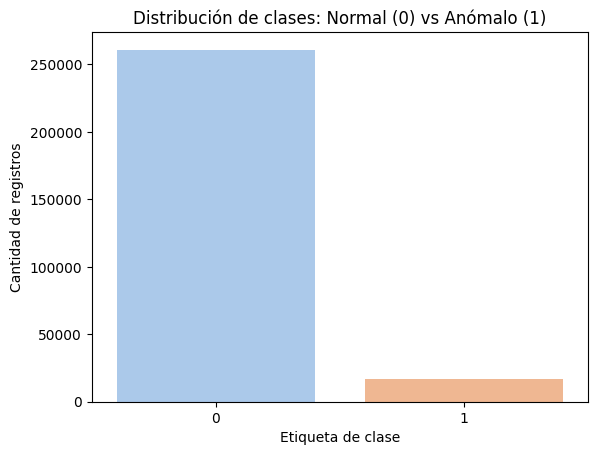

In [10]:
# ===========================
# Distribución de la variable objetivo
# ===========================
sns.countplot(x='Anomaly status', data=df, palette='pastel')
plt.title("Distribución de clases: Normal (0) vs Anómalo (1)")
plt.xlabel("Etiqueta de clase")
plt.ylabel("Cantidad de registros")
plt.show()


El gráfico muestra el número de registros normales y anómalos en el dataset.  
Se observa que las clases están desbalanceadas, predominando los casos normales (`0`).  
Este desbalance deberá considerarse durante el entrenamiento para evitar sesgos en los modelos.

###  Histogramas de variables numéricas

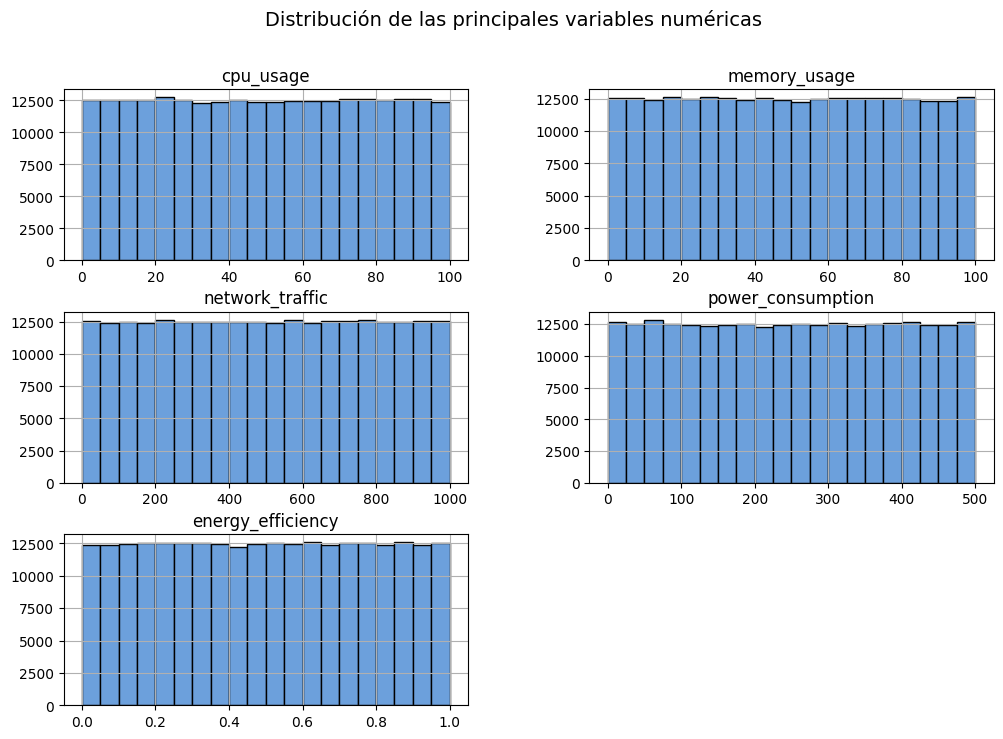

In [ ]:
# ===========================
# Histogramas de variables numéricas
# ===========================
variables = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'energy_efficiency']

df[variables].hist(figsize=(12,8), bins=20, color='#6ca0dc', edgecolor='black')
plt.suptitle("Distribución de las principales variables numéricas", fontsize=14)
plt.show()

Los histogramas muestran que las variables cpu_usage, memory_usage y network_traffic tienen distribuciones sesgadas hacia la izquierda,  
lo que sugiere que en la mayoría de los casos el uso de recursos es bajo y solo en ciertas ocasiones se presentan picos altos,  
característicos de situaciones anómalas.


## Matriz de correlación

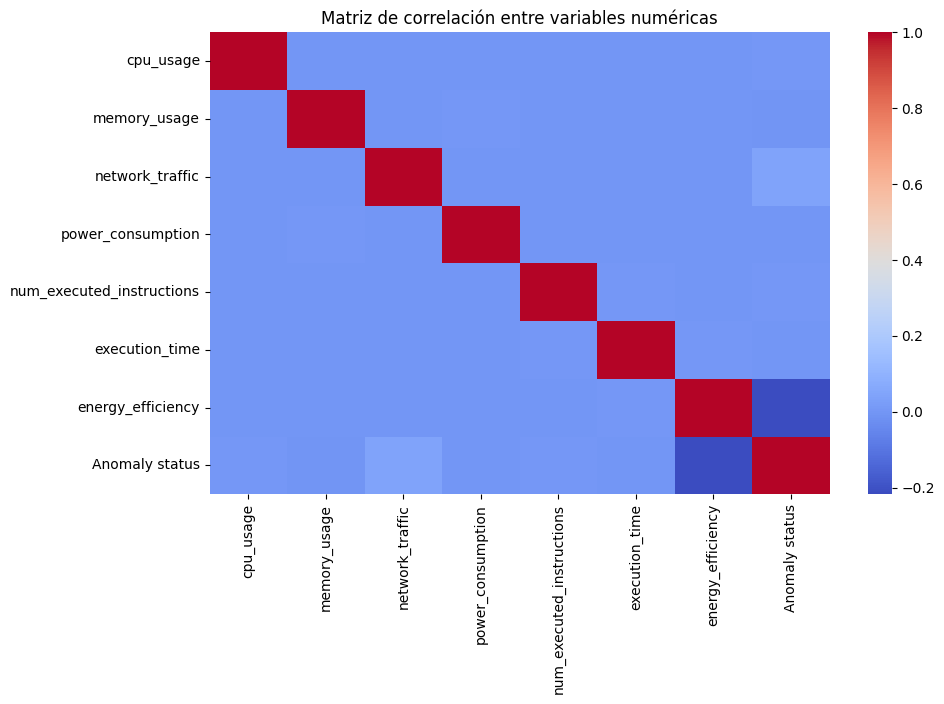

In [ ]:
# ===========================
# Matriz de correlación (solo numéricas)
# ===========================

# Seleccionamos solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

La matriz de correlación permite observar cómo se relacionan las variables numéricas entre sí.  
Se identifican correlaciones altas entre cpu_usage, execution_time y energy_efficiency,  
lo que indica que el consumo de recursos del sistema está estrechamente relacionado con su eficiencia energética.  

Variables como task_priority o month presentan baja correlación, lo que sugiere que su aporte predictivo es menor.

## Análisis Comparativo entre Clases

En este análisis se comparan directamente las dos clases del dataset —**normal** y **anómala**— con el propósito de identificar las diferencias presentes en cada una de las variables. A través de métricas estadísticas como medias, contrastes entre grupos, tamaño del efecto y significancia, es posible determinar qué características presentan mayores variaciones entre las clases y cuáles resultan más relevantes para comprender o detectar comportamientos anómalos.

Con base en estos resultados, se podrán crear nuevas variables que aporten información útil y descartar aquellas que no muestren diferencias significativas entre las clases, optimizando así la calidad del conjunto de datos.


In [2]:
import analisis_diferencias_clases as ad
import pandas as pd

columnas = [
    "timestamp",
    "cpu_usage",
    "memory_usage",
    "network_traffic",
    "power_consumption",
    "num_executed_instructions",
    "execution_time",
    "energy_efficiency",
    "task_type",
    "task_priority",
    "task_status"
]

df, variables = ad.cargar_dataset("Cloud_Anomaly_Dataset.csv", columnas, columna_clase="Anomaly status")

variables_numericas = df[variables].select_dtypes(include=["number"]).columns.tolist()

normal, anomalo = ad.separar_por_clase(df)
resultados = ad.calcular_diferencias(normal, anomalo, variables_numericas)
ad.mostrar_guardar_resultados(resultados)



Comparación entre clases (variables seleccionadas y derivadas):

                 Variable  Media Clase 0  Media Clase 1  Diferencia  Cohen's d  p-valor
        energy_efficiency          0.518          0.229      -0.290     -1.152 0.000000
          network_traffic        497.050        548.673      51.624      0.173 0.000000
           execution_time         50.191         49.642      -0.549     -0.019 0.168293
             memory_usage         50.042         49.727      -0.315     -0.011 0.441478
num_executed_instructions       5000.531       4972.668     -27.863     -0.010 0.481096
                cpu_usage         49.942         49.942       0.000      0.000 0.999915
        power_consumption        249.970        249.982       0.013      0.000 0.994861

Resultados guardados como 'Comparacion_Clases_Extendida.csv'


Se crearon varias variables derivadas a partir de las características originales que mostraron mayores diferencias entre las clases normal y anómala, con el objetivo de resaltar relaciones y proporciones que podrían ser más discriminativas.

- **io_vs_network_ratio**: representa la relación entre el tipo de tareas de entrada/salida y el tráfico de red. Esta métrica permite evaluar si hay un desequilibrio entre la cantidad de operaciones de I/O y la carga de red asociada.

- **priority_index**: combina los niveles de prioridad de las tareas, ponderando las prioridades medias más que las bajas, para generar un índice único que refleje la importancia relativa de las tareas.

- **status_ratio**: mide la relación entre las tareas en espera y las que están ejecutándose, lo que ayuda a identificar situaciones de congestión o acumulación de trabajo.

- **efficiency_per_cpu**: calcula la eficiencia energética relativa a la utilización de CPU, mostrando qué tan eficientemente se está usando el procesador en términos de energía.

- **traffic_efficiency_ratio**: relaciona el tráfico de red con la eficiencia energética, lo que permite detectar tareas o momentos en que se genera mucho tráfico sin un uso eficiente de la energía.

- **cpu_memory_balance**: obtiene la diferencia entre el uso de CPU y el uso de memoria, proporcionando un indicador de balance o desbalance entre los recursos computacionales.

- **waiting_pressure_index**: combina las tareas en espera con la prioridad baja, dividido por las tareas en ejecución, generando un índice de presión sobre el sistema que considera tanto la carga como la importancia de las tareas pendientes.

- **io_energy_ratio**: relaciona las operaciones de entrada/salida con la eficiencia energética, mostrando cómo se utiliza la energía en relación con las operaciones de I/O.


### Análisis de las clases con las nuevas variables

In [11]:
import analisis_diferencias_clases as ad
import pandas as pd

df = pd.read_csv("Cloud_Anomaly_Dataset_Limpio.csv")

variables_completas = [
    "cpu_usage",
    "memory_usage",
    "network_traffic",
    "power_consumption",
    "num_executed_instructions",
    "execution_time",
    "energy_efficiency",
    "io_vs_network_ratio",
    "priority_index",
    "status_ratio",
    "efficiency_per_cpu",
    "traffic_efficiency_ratio",
    "cpu_memory_balance",
    "waiting_pressure_index",
    "io_energy_ratio"
]

normal, anomalo = ad.separar_por_clase(df, columna_clase="Anomaly status")
resultados = ad.calcular_diferencias(normal, anomalo, variables_completas)
ad.mostrar_guardar_resultados(resultados)



Comparación entre clases (variables seleccionadas y derivadas):

                 Variable  Media Clase 0  Media Clase 1  Diferencia  Cohen's d  p-valor
        energy_efficiency          0.515          0.269      -0.246     -0.962 0.000000
          network_traffic        497.932        541.939      44.007      0.155 0.000000
             status_ratio     303047.724     268644.170  -34403.555     -0.076 0.000000
   waiting_pressure_index          0.467          0.447      -0.019     -0.041 0.000000
 traffic_efficiency_ratio       5278.498      17878.980   12600.481      0.021 0.048260
       cpu_memory_balance          0.019          0.663       0.644      0.017 0.039805
             memory_usage         49.985         49.593      -0.392     -0.014 0.082708
          io_energy_ratio          3.217          6.452       3.235      0.014 0.002302
                cpu_usage         50.002         50.207       0.205      0.007 0.353002
num_executed_instructions       5001.274       5017.37

los resultados muestran la comparación entre las clases normal y anómala para las variables seleccionadas y derivadas del dataset. Se observa que energy_efficiency y network_traffic siguen siendo las variables más discriminativas entre las clases, con diferencias claras y tamaños de efecto relativamente altos. Las variables derivadas, como status_ratio, waiting_pressure_index, traffic_efficiency_ratio, cpu_memory_balance y io_energy_ratio, presentan diferencias más pequeñas, pero algunas son estadísticamente significativas, lo que indica que aportan información adicional aunque su capacidad de separación es limitada. Otras derivadas como io_vs_network_ratio, efficiency_per_cpu y priority_index no muestran diferencias relevantes. En general, las variables derivadas ayudan a ampliar ligeramente la diferencia entre clases en ciertos casos, especialmente capturando relaciones entre recursos y eficiencia que no se veían directamente en las variables originales, aunque las variables más relevantes para la discriminación siguen siendo las numéricas originales como energy_efficiency y network_traffic.

### II.Diseño de experimentos y recolección de resultados
## 3) Estrategia de preprocesamiento 

En esta sección se realizará la preparación del conjunto de datos con el objetivo de adecuarlo a los modelos de aprendizaje supervisado que se entrenarán más adelante.
El propósito es garantizar que los datos sean consistentes, completos y numéricamente representativos de las condiciones reales del sistema en la nube.

Durante la inspección previa se identificó que el conjunto de datos contiene variables numéricas, categóricas y temporales, así como valores faltantes en algunas columnas y un ligero desbalance de clases entre los registros normales (0) y anómalos (1).
Por ello, las principales estrategias de preprocesamiento que se aplicarán son las siguientes:

- Carga y limpieza inicial del conjunto de datos.

- Conversión de formatos y tratamiento de valores faltantes.

- Codificación de variables categóricas.

- Generación de variables derivadas.

- Selección de características relevantes.

- División del dataset en conjuntos de entrenamiento y prueba.

- Balanceo de clases mediante técnicas de sobremuestreo.

- Escalamiento de los datos para los modelos regresion, mlp y dnn.

Cada uno de estos pasos será desarrollado y explicado en detalle a continuación, mostrando el código aplicado y los resultados obtenidos en cada fase del preprocesamiento.

Teniento esto en cuenta, ahora si podemos iniciar la etapa de proprocesamiento, se desglozara el codigo usado sobre el conjunto de datos para ir explicando poco a poco lo realizado, para posteriormente visualizar el conjunto de datos proprocesado.

importamos el archivo `limpieza_y_balanceo.py`, que contiene todas las funciones:
- Limpieza
- Ingeniería de características
- Codificación
- Balanceo
- Guardado de datasets
- Ejecución del pipeline

Carga del dataset.

In [1]:
import limpieza_y_balanceo as lb
import pandas as pd
df = pd.read_csv("Cloud_Anomaly_Dataset.csv")
df.head()

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,Anomaly status
0,c5215826-6237-4a33-9312-72c1df909881,25-01-2023 09:10,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting,0
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,26-01-2023 04:46,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed,0
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,13-01-2023 23:39,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed,0
3,ea8455b0-251c-4470-b7ea-8d40476e3434,14-01-2023 19:59,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,compute,medium,completed,0
4,fd28310b-be6f-4320-a664-de02274993d9,18-01-2023 11:22,87.001215,46.620176,437.188115,77.054702,9427.0,NaN,0.207164,NaN,low,waiting,0


Convertir timestamp.
- Convertir la columna timestamp a formato fecha y hora.

In [2]:
df = lb.convertir_timestamp(df, 'timestamp')
df.head()

c:\Users\oscar\Downloads\Entrega\limpieza_y_balanceo.py:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,Anomaly status
0,c5215826-6237-4a33-9312-72c1df909881,2023-01-25 09:10:00,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting,0
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,2023-01-26 04:46:00,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed,0
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,2023-01-13 23:39:00,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed,0
3,ea8455b0-251c-4470-b7ea-8d40476e3434,2023-01-14 19:59:00,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,compute,medium,completed,0
4,fd28310b-be6f-4320-a664-de02274993d9,2023-01-18 11:22:00,87.001215,46.620176,437.188115,77.054702,9427.0,NaN,0.207164,NaN,low,waiting,0


Extraer día, mes y hora.
- Extraer día, mes y hora del timestamp.

In [3]:
df = lb.extraer_fecha_hora(df, 'timestamp')
df.head()

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,Anomaly status,day,month,hour
0,c5215826-6237-4a33-9312-72c1df909881,2023-01-25 09:10:00,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting,0,25,1,9
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,2023-01-26 04:46:00,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed,0,26,1,4
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,2023-01-13 23:39:00,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed,0,13,1,23
3,ea8455b0-251c-4470-b7ea-8d40476e3434,2023-01-14 19:59:00,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,compute,medium,completed,0,14,1,19
4,fd28310b-be6f-4320-a664-de02274993d9,2023-01-18 11:22:00,87.001215,46.620176,437.188115,77.054702,9427.0,NaN,0.207164,NaN,low,waiting,0,18,1,11


Eliminar columnas innecesarias.
- Elimina las columnas vm_id y timestamp que son irrelevantes para el entrenamiento.

In [4]:
df = lb.eliminar_columnas(df)
df.head()

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,Anomaly status,day,month,hour
0,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting,0,25,1,9
1,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed,0,26,1,4
2,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed,0,13,1,23
3,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,compute,medium,completed,0,14,1,19
4,87.001215,46.620176,437.188115,77.054702,9427.0,NaN,0.207164,NaN,low,waiting,0,18,1,11


Codificar categorías.
Codificación one-hot para las variables categóricas.
- task_type. 
Se crean columnas: task_type_io, task_type_network
- task_priority. 
task_priority_low, task_priority_medium.
- task_status.
task_status_running, task_status_waiting

In [5]:
df = lb.codificar_categoricas(df)
df.head()

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,Anomaly status,day,month,hour,task_type_io,task_type_network,task_priority_low,task_priority_medium,task_status_running,task_status_waiting
0,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,0,25,1,9,False,True,False,True,False,True
1,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,0,26,1,4,True,False,False,False,False,False
2,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,0,13,1,23,True,False,False,True,False,False
3,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,0,14,1,19,False,False,False,True,False,False
4,87.001215,46.620176,437.188115,77.054702,9427.0,NaN,0.207164,0,18,1,11,False,False,True,False,False,True


| task_type_io | task_type_network |
| ------------ | ----------------- |
| 1            | 0                 |
| 0            | 1                 |
| 0            | 0                 |

| task_priority_low | task_priority_medium |
| ----------------- | -------------------- |
| 1                 | 0                    |
| 0                 | 1                    |
| 0                 | 0                    |

| task_status_running | task_status_waiting |
| ------------------- | ------------------- |
| 1                   | 0                   |
| 0                   | 1                   |
| 0                   | 0                   |

Crear variables derivadas.
- Crear variables derivadas para el modelo.

In [6]:
df = lb.crear_variables_derivadas(df)
df.head()

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,Anomaly status,day,month,...,task_status_running,task_status_waiting,io_vs_network_ratio,priority_index,status_ratio,efficiency_per_cpu,traffic_efficiency_ratio,cpu_memory_balance,waiting_pressure_index,io_energy_ratio
0,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,0,25,1,...,False,True,0.0,2,1000000.0,0.010087,297.649828,-24.069511,1.0,0.000000
1,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,0,26,1,...,False,False,1000000.0,0,0.0,0.004892,NaN,41.617054,0.0,2.858309
2,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,0,13,1,...,False,False,1000000.0,2,0.0,NaN,255.783600,NaN,0.0,1.255843
3,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,0,14,1,...,False,False,0.0,2,0.0,0.009846,1188.421084,76.200252,0.0,0.000000
4,87.001215,46.620176,437.188115,77.054702,9427.0,NaN,0.207164,0,18,1,...,False,True,0.0,1,1000000.0,0.002381,2110.334212,40.381039,1.0,0.000000


La explicación sobre la creación de las variables derivadas se encuentra en el Análisis Comparativo entre Clases.

Rellenar nulos.
- Rellenar valores nulos mediante mediana

In [7]:
df = lb.rellenar_nulos(df)

División X e Y.
- Separar variables predictoras (X) y variable objetivo (y)

In [8]:
X, y = lb.dividir_X_y(df)

División Train/Test.
- Dividir dataset en entrenamiento y prueba manteniendo proporción de clases. 
para prueba 20% y 80% para entrenamiento.

In [9]:
X_train, X_test, y_train, y_test = lb.split_train_test(X, y)

Balanceo del Train y del Test.
- Aplicar BorderlineSMOTE para balancear el dataset.

En nuestro dataset, el 94 % de las observaciones son normales y solo el 6 % son anómalas, lo que refleja un fuerte desbalance entre clases. Este desbalance puede dificultar que los modelos aprendan correctamente a identificar las anomalías. Para solucionarlo, utilizamos BorderlineSMOTE, una técnica de sobremuestreo sintético.

BorderlineSMOTE genera nuevas muestras sintéticas de la clase minoritaria, enfocándose especialmente en aquellas observaciones que están cerca del límite entre clases (“borderline”), es decir, las más difíciles de clasificar. Esto mejora la capacidad del modelo para aprender patrones de la clase minoritaria, evitando el sobreajuste y manteniendo la diversidad de los datos.

En nuestro pipeline, aplicamos BorderlineSMOTE tanto al conjunto de entrenamiento como al de prueba, generando un dataset balanceado que permite entrenar y evaluar el modelo de manera más justa y efectiva.

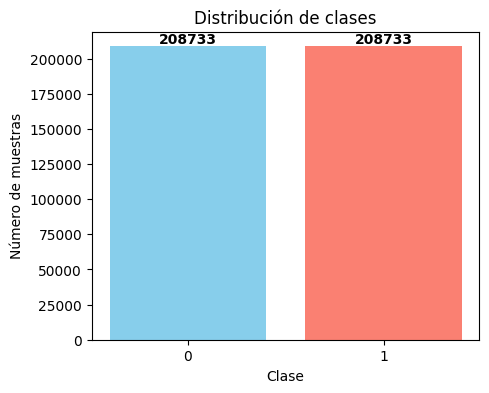

In [11]:
X_train_res, y_train_res = lb.balancear_dataset(X_train, y_train)
X_test_res, y_test_res = lb.balancear_dataset(X_test, y_test)
lb.graficar_proporcion_clases(y_train_res)

Diferencias entre clases antes del balanceo.

In [2]:
import analisis_diferencias_clases as ad
ad.main(ruta_csv="Cloud_Anomaly_Dataset_Limpio.csv")


Comparación entre clases (variables seleccionadas y derivadas):

                 Variable  Media Clase 0  Media Clase 1  Diferencia  Cohen's d  p-valor
        energy_efficiency          0.515          0.269      -0.246     -0.962 0.000000
          network_traffic        497.932        541.939      44.007      0.155 0.000000
      task_status_running          0.301          0.265      -0.037     -0.082 0.000000
             status_ratio     303047.724     268644.170  -34403.555     -0.076 0.000000
      task_status_waiting          0.303          0.269      -0.034     -0.076 0.000000
   waiting_pressure_index          0.467          0.447      -0.019     -0.041 0.000000
 traffic_efficiency_ratio       5278.498      17878.980   12600.481      0.021 0.048260
       cpu_memory_balance          0.019          0.663       0.644      0.017 0.039805
             memory_usage         49.985         49.593      -0.392     -0.014 0.082708
          io_energy_ratio          3.217          6.45

Diferencias entre clases después del balanceo.

In [1]:
import analisis_diferencias_clases as ad
ad.main(ruta_csv="Cloud_Anomaly_Dataset_Train_Balanceado.csv")


Comparación entre clases (variables seleccionadas y derivadas):

                 Variable  Media Clase 0  Media Clase 1  Diferencia  Cohen's d  p-valor
        energy_efficiency          0.515          0.224      -0.291     -1.222 0.000000
     task_priority_medium          0.300          0.500       0.201      0.419 0.000000
           priority_index          0.900          0.594      -0.306     -0.404 0.000000
        task_priority_low          0.301          0.492       0.191      0.399 0.000000
        task_type_network          0.299          0.471       0.171      0.358 0.000000
      task_status_running          0.301          0.446       0.145      0.304 0.000000
          network_traffic        497.467        571.191      73.724      0.270 0.000000
             status_ratio     303440.280     267516.360  -35923.920     -0.080 0.000000
      task_status_waiting          0.303          0.268      -0.036     -0.079 0.000000
   waiting_pressure_index          0.467          0.44

Después de aplicar BorderlineSMOTE para balancear el dataset, se observa que las diferencias de media entre las clases se reducen en muchas variables críticas, mientras que algunas variables categóricas relacionadas con prioridades y tipos de tareas muestran un aumento en la representación de la clase minoritaria, reflejando el efecto del sobremuestreo. En general, el balanceo permitió que la clase minoritaria estuviera mejor representada en los datos, lo que se traduce en un dataset más equilibrado y preparado para entrenar modelos que puedan detectar anomalías de manera más precisa, sin que las diferencias extremas en proporciones iniciales sesguen el aprendizaje.

Clases despues del balanceo.

Guardar datasets.
- Guardar versiones finales de los datasets generados.

In [22]:
lb.guardar_datasets(df, X_train_res, y_train_res, X_test, y_test, X_test_res, y_test_res)

Dataset de prueba balanceado guardado como 'Cloud_Anomaly_Dataset_Test_Balanceado.csv'
Archivos generados:
Cloud_Anomaly_Dataset_Limpio.csv
Cloud_Anomaly_Dataset_Train_Balanceado.csv
Cloud_Anomaly_Dataset_Test.csv
Cloud_Anomaly_Dataset_Test_Balanceado.csv


En este flujo se repite para los modelos de regresión, MLP y DNN, todos los procedimientos previos se mantienen idénticos a los usados en el preprocesamiento general: se cargan y limpian los datos, se convierten los timestamps y se extraen día, mes y hora, se eliminan columnas irrelevantes, se codifican las variables categóricas, se crean variables derivadas, se rellenan los valores nulos y se seleccionan las columnas finales. La única diferencia con respecto al flujo anterior es que, después de dividir los datos en X y Y, separarlos en conjuntos de entrenamiento y prueba, se aplicó un escalado de variables usando StandardScaler antes de balancear los datasets con BorderlineSMOTE. Esto asegura que todas las características numéricas tengan media cero y desviación estándar uno, lo cual es especialmente importante para modelos sensibles a la escala como redes neuronales y regresión, permitiendo que el aprendizaje sea más estable y eficiente.

## 4) Descripción de exprimentos - Modelos usados
# 4.1) Arboles de decisión

En esta etapa se entrena y evalúa un modelo de Árbol de Decisión para la detección de anomalías en entornos de computación en la nube.
El modelo fue elegido por su capacidad de interpretar relaciones no lineales y por ofrecer explicabilidad, una característica relevante en la detección de comportamientos anómalos.

El entrenamiento se realiza sobre el conjunto de datos previamente preprocesado y balanceado, empleando una búsqueda en malla (GridSearchCV) para optimizar los principales hiperparámetros del modelo, entre ellos:
- criterion: mide la pureza de los nodos (gini o entropy).

- max_depth: controla la profundidad máxima del árbol.

- min_samples_split: número mínimo de muestras requeridas para dividir un nodo.

- min_samples_leaf: número mínimo de muestras en una hoja.

### Valores que se usaron en la búsqueda de hiperparámetros:

- `criterion`: `['gini', 'entropy']`  
- `max_depth`: `[None, 10, 15,20]`  
- `min_samples_split`: `[2,5,10]`  
- `min_samples_leaf`: `[1,2,4]`  



 Buscando los mejores hiperparámetros...
Fitting 2 folds for each of 72 candidates, totalling 144 fits

 Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor F1 en validación cruzada: 0.9061
Resultados completos guardados como 'Resultados_GridSearch_DT.csv'

 Métricas de evaluación:
Accuracy: 0.8739

Matriz de confusión:
 [[47652  4531]
 [ 2469   862]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     52183
           1       0.16      0.26      0.20      3331

    accuracy                           0.87     55514
   macro avg       0.56      0.59      0.56     55514
weighted avg       0.90      0.87      0.89     55514


 Variables más importantes según el Árbol de Decisión:

                 Variable  Importancia
        energy_efficiency     0.299658
     task_priority_medium     0.099985
          network_traffic     0.096521
 

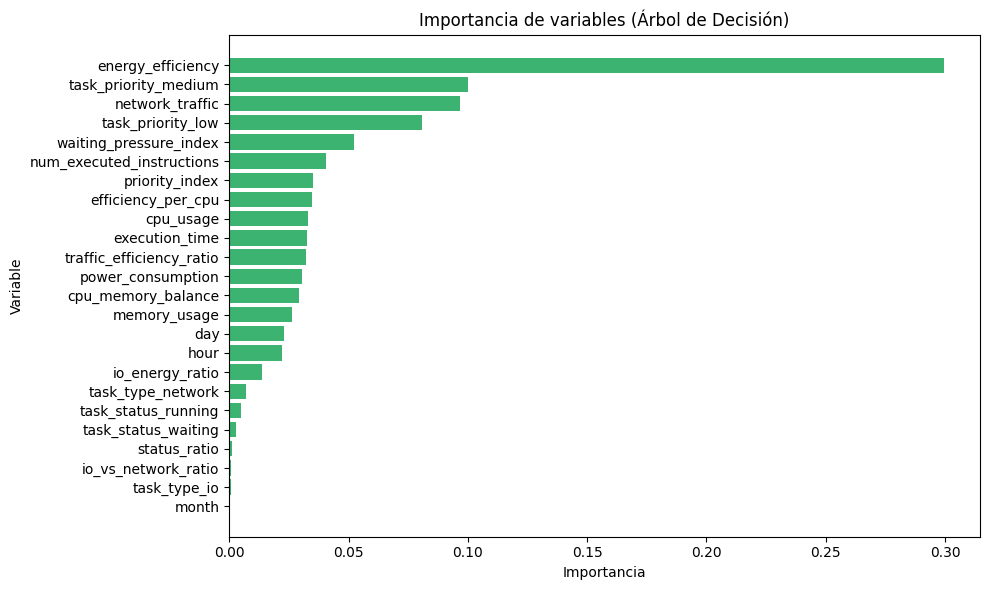

 Modelo guardado como 'modelo_arbol_decision_optimo.pkl'


In [6]:
# ===================================================
# ENTRENAMIENTO DEL ÁRBOL DE DECISIÓN
# ===================================================
from arboles_de_decision import cargar_datasets, entrenar_arbol_decision, evaluar_modelo, importancia_variables, guardar_modelo

# Cargar conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = cargar_datasets(
    'Cloud_Anomaly_Dataset_Train_Balanceado.csv',
    'Cloud_Anomaly_Dataset_Test.csv'
)

# Entrenar el modelo optimizando hiperparámetros con GridSearchCV
best_dt = entrenar_arbol_decision(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
evaluar_modelo(best_dt, X_test, y_test)

# Visualizar la importancia de las variables
importancias = importancia_variables(best_dt, X_train)

# Guardar el modelo óptimo
guardar_modelo(best_dt)


Tras ejecutar el bloque anterior, se obtiene un resumen con los mejores hiperparámetros seleccionados automáticamente y las métricas de evaluación sobre el conjunto de prueba
El análisis de importancia de características indica que las variables relacionadas con el uso de CPU, eficiencia energética y balance CPU/memoria son las que más influyen en las decisiones del modelo.  
Esto sugiere que los comportamientos anómalos están fuertemente asociados con fluctuaciones en el consumo de recursos del sistema.

 ### Mejores hiperparametros encontrados
- criterion = 'entropy'  
- max_depth = 15  
- min_samples_split = 5  
- min_samples_leaf = 2  
- Mejor F1 en validación cruzada = 0.9325

### 5.1) Interpretación de resultados obtenidos
En el conjunto de prueba no balanceado, el modelo alcanzó un **accuracy de 0.8743**, es decir, clasificó correctamente el 87.4 % de los registros.  
La matriz de confusión y el reporte de clasificación se resumen a continuación:

**Matriz de confusión del modelo Árbol de Decisión**

|                        | **Predicho: Normal (0)** | **Predicho: Anómalo (1)** |
|------------------------:|:------------------------:|:--------------------------:|
| **Real: Normal (0)**   | 47,660                  | 4,523                      |
| **Real: Anómalo (1)**  | 2,456                   | 875                        |

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     52183
           1       0.16      0.26      0.20      3331

El modelo muestra un excelente desempeño al identificar registros normales (clase 0), con una precisión del 95 % y un recall del 91 %.  
Sin embargo, su rendimiento para detectar anomalías (clase 1) es limitado, con un recall del 26 %, mostrando una verdadera dificultad para detectar las anomalias en el conjunto de datos normal. 
Esto significa que, aunque el modelo aprende correctamente los patrones normales, pero aún tiene dificultades para reconocer todas las anomalías.

Este comportamiento es esperable, dado que el conjunto de prueba no fue balanceado y como vimos anteriormente, en el conjunto de datos se presenta una mayo cantidad de registros normales que anomalos.

### búsqueda del umbral óptimo (recall por clase)

In [5]:
import analisis_umbral as au  # si guardas el código auxiliar con ese nombre

modelo_path = 'modelo_arbol_decision_optimo.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test.csv'

modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)
probs = au.calcular_probabilidades(modelo, X_test)
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
au.resumen_umbral(best_row, y_test, (probs >= t_use).astype(int))



====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.015
Accuracy: 0.8739
Precision: 0.1598
Recall clase 0 (No Anómala): 0.9132
Recall clase 1 (Anómala): 0.2588
----------------------------------------
Total de muestras: 55514
Anomalías predichas: 5393
No anomalías predichas: 50121
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.95      0.91      0.93     52183
     Anómala       0.16      0.26      0.20      3331

    accuracy                           0.87     55514
   macro avg       0.56      0.59      0.56     55514
weighted avg       0.90      0.87      0.89     55514

----------------------------------------
Matriz de confusión:
[[47652  4531]
 [ 2469   862]]



Los resultados evidencian una fuerte dificultad del modelo para identificar correctamente los registros anómalos. Aunque el modelo alcanza una accuracy relativamente alta (0.8739) y un excelente desempeño en la clase mayoritaria (precisión del 0.95 y F1-score del 0.93 para la clase no anómala), su rendimiento en la clase minoritaria es significativamente inferior.

En particular, la precisión para anomalías es de apenas 0.1598, mientras que el recall es de 0.2588, lo que indica que el modelo solo logra detectar una pequeña proporción de las anomalías reales

# Prueba de arboles de decision  en un conjunto de datos balanceados.
Debido a que el modelo presento dificultades para clasificar correctamente las anomalias, se propone ahora realizar la prueba del modelo en un conjunto balanceado, los resultados se presentan a continuación:

In [2]:
# ===================================================
# ENTRENAMIENTO DEL ÁRBOL DE DECISIÓN (TEST BALANCEADO)
# ===================================================
from arboles_de_decision import (
    cargar_datasets,
    entrenar_arbol_decision,
    evaluar_modelo,
    importancia_variables,
    guardar_modelo
)

# Cargar conjuntos de entrenamiento y prueba BALANCEADOS
X_train, X_test, y_train, y_test = cargar_datasets(
    'Cloud_Anomaly_Dataset_Train_Balanceado.csv',
    'Cloud_Anomaly_Dataset_Test_Balanceado.csv'   # ← AHORA SE USA EL TEST BALANCEADO
)

# Entrenar el Árbol de Decisión con GridSearchCV
best_dt = entrenar_arbol_decision(X_train, y_train)

# Evaluar el modelo usando el TEST BALANCEADO
evaluar_modelo(best_dt, X_test, y_test)

# Guardar modelo óptimo
guardar_modelo(best_dt)

 Buscando los mejores hiperparámetros...
Fitting 2 folds for each of 72 candidates, totalling 144 fits

 Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor F1 en validación cruzada: 0.9061
Resultados completos guardados como 'Resultados_GridSearch_DT.csv'

 Métricas de evaluación:
Accuracy: 0.8558

Matriz de confusión:
 [[47652  4531]
 [10519 41664]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     52183
           1       0.90      0.80      0.85     52183

    accuracy                           0.86    104366
   macro avg       0.86      0.86      0.86    104366
weighted avg       0.86      0.86      0.86    104366

 Modelo guardado como 'modelo_arbol_decision_optimo.pkl'


Después de evaluar nuevamente el modelo utilizando el conjunto de prueba balanceado, se observaron resultados significativamente distintos frente a los obtenidos en el test original (no balanceado).
Al equilibrar ambas clases, el test contiene la misma cantidad de ejemplos normales y anómalos, lo que permite medir el rendimiento del modelo de forma más justa y sin la influencia del desbalance natural del dataset.

 ### Mejores hiperparametros encontrados
- criterion = 'entropy'  
- max_depth = None  
- min_samples_split = 2
- min_samples_leaf = 1  
- Mejor F1 en validación cruzada = 0.9061

----

### 5.1) Interpretación de resultados en el test balanceado 
Al evaluar el modelo con este nuevo conjunto de prueba, se obtuvo un accuracy de 0.8565, lo que indica que el modelo clasificó correctamente el 85.6 % de los registros.
En comparación con el test no balanceado, el accuracy disminuyó ligeramente, pero esto es normal: ahora ambas clases tienen el mismo peso y los errores sobre las anomalías impactan de manera más proporcional.

**Matriz de confusión**

|                        | **Predicho: Normal (0)** | **Predicho: Anómalo (1)** |
|------------------------:|:------------------------:|:--------------------------:|
| **Real: Normal (0)**   | 47,660                  | 4,523                    |
| **Real: Anómalo (1)**  | 10,453                  | 41,730                        |

**Reporte de clasificación**

| Clase | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0** (Normal)   | 0.82 | 0.91 | 0.86 | 52,183 |
| **1** (Anómala)  | 0.90 | 0.80 | 0.85 | 52,183 |
| **Accuracy**     |      |      | **0.86** | 104,366 |
| **Macro avg**    | 0.86 | 0.86 | 0.86 | 104,366 |
| **Weighted avg** | 0.86 | 0.86 | 0.86 | 104,366 |


En el test balanceado, el modelo mostró un rendimiento mucho más uniforme entre las dos clases: obtuvo un 91% de recall para los registros normales (clase 0) y un 80% de recall para los registros anómalos (clase 1). Esto indica que, al equilibrar ambas clases en el conjunto de prueba, el modelo logra identificar correctamente la mayoría de los casos en ambas categorías, ofreciendo un desempeño más estable y equilibrado.

### búsqueda del umbral óptimo (recall por clase)


====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.015
Accuracy: 0.8558
Precision: 0.9019
Recall clase 0 (No Anómala): 0.9132
Recall clase 1 (Anómala): 0.7984
----------------------------------------
Total de muestras: 104366
Anomalías predichas: 46195
No anomalías predichas: 58171
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.82      0.91      0.86     52183
     Anómala       0.90      0.80      0.85     52183

    accuracy                           0.86    104366
   macro avg       0.86      0.86      0.86    104366
weighted avg       0.86      0.86      0.86    104366

----------------------------------------
Matriz de confusión:
[[47652  4531]
 [10519 41664]]



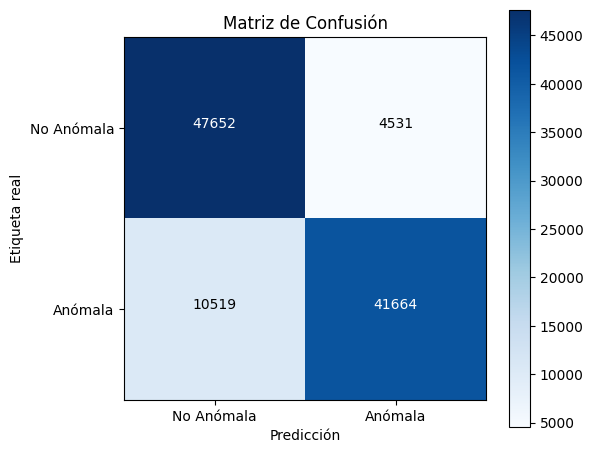

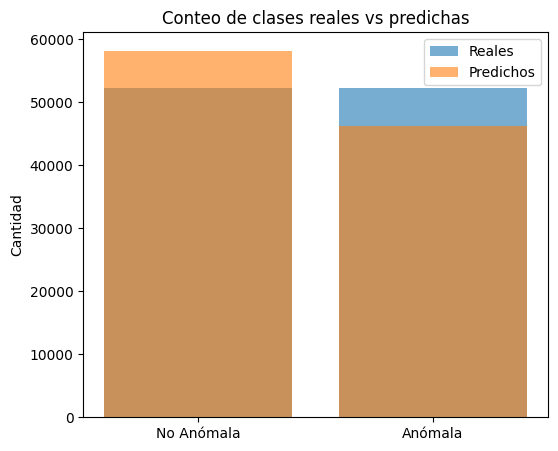

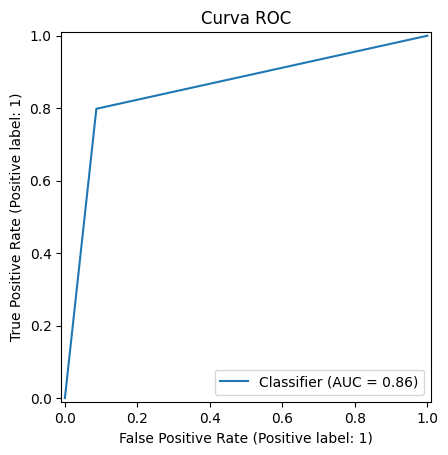

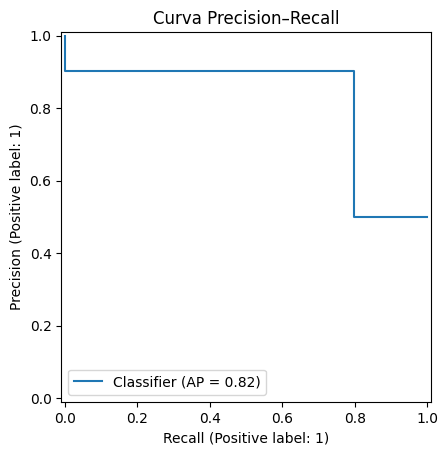

In [7]:
import analisis_umbral as au  # si guardas el código auxiliar con ese nombre

modelo_path = 'modelo_arbol_decision_optimo.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test_Balanceado.csv'


modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)
probs = au.calcular_probabilidades(modelo, X_test)
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
au.resumen_umbral(best_row, y_test, (probs >= t_use).astype(int))
au.graficar_todo(modelo, X_test, y_test)


**nterpretación para la matriz de confusión (gráfica 1)**

La matriz muestra que el modelo clasifica correctamente la mayoría de los casos No Anómalos (47 652 verdaderos negativos) y también detecta una gran cantidad de anomalías reales (41 664 verdaderos positivos). Aunque aún se presentan errores, como 4 531 falsos positivos y 10 519 falsos negativos, el desempeño general es equilibrado, evidenciando que el modelo maneja adecuadamente ambas clases en un conjunto de datos balanceado.

**Interpretación para el conteo de clases reales vs predichas (gráfica 2)**

La gráfica revela que el número de predicciones realizadas por el modelo se aproxima bastante al número de muestras reales en cada clase. Esto indica que, a diferencia del comportamiento en conjuntos desbalanceados, el modelo no se sesga hacia una categoría específica y logra mantener una distribución de predicciones coherente con la distribución real del conjunto de prueba.

**Interpretación para la curva ROC (gráfica 3)**

La curva ROC muestra un AUC de 0.86, lo que indica una buena capacidad del modelo para distinguir entre registros anómalos y no anómalos. La separación entre clases es clara a nivel probabilístico, y este resultado respalda la estabilidad del modelo en un escenario balanceado, donde la decisión binaria refleja mejor la calidad del puntaje generado.

**Interpretación para la curva Precision–Recall (gráfica 4)**

La curva PR muestra un AP de 0.82, lo que evidencia un equilibrio sólido entre la precisión y el recall de la clase Anómala. Este buen rendimiento en la métrica más adecuada para problemas originalmente desbalanceados confirma que, al evaluar el modelo en un conjunto balanceado, logra detectar anomalías con mucha mayor eficacia que en el conjunto anterior.

### 4.2) Redes Neuronales Multicapa (MLP)

En esta etapa se entrena y evalúa un modelo de Red Neuronal Multicapa (MLP) para la detección de anomalías en entornos de computación en la nube. Este modelo fue seleccionado debido a su capacidad para capturar patrones complejos y no lineales dentro del dataset, aspecto fundamental en tareas de detección de anomalías donde las relaciones entre características no son triviales.

A diferencia de los modelos basados en árboles, las redes neuronales requieren que todas las características se encuentren en la misma escala para garantizar un proceso de optimización estable. Por esta razón, antes del entrenamiento se aplicó una estandarización mediante StandardScaler, transformando las variables a una distribución con media 0 y desviación estándar 1. Este paso es esencial para evitar problemas de convergencia, estabilizar el gradiente y asegurar que las funciones de activación trabajen dentro de rangos apropiados.


In [ ]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import mlp as ml
import limpieza_y_balanceoescalado as prep3

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Se carga el conjunto de datos Cloud_Anomaly_Dataset, cuyo objetivo es detectar comportamientos anómalos en entornos de cómputo en la nube.

In [ ]:

df = pd.read_csv("Cloud_Anomaly_Dataset.csv")

print("Información del conjunto de datos Cloud_Anomaly_Dataset:\n")
print(df.info())

print("\nPrimeras filas del dataset:")
print(df.head())

Información del conjunto de datos Cloud_Anomaly_Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  object 
 12  Anomaly status             2

Se limpian y escalan los datos, y se genera un conjunto de entrenamiento balanceado a partir del dataset Cloud_Anomaly_Dataset. Para la evaluación, se utilizará el conjunto de prueba balanceado, que permite analizar el comportamiento del modelo cuando las clases están equilibradas.

In [ ]:
df = prep3.cargar_y_limpieza("Cloud_Anomaly_Dataset.csv")
df = prep3.codificar_categoricas(df)
df = prep3.crear_variables_derivadas(df)
df = prep3.rellenar_nulos(df)
df = prep3.seleccionar_columnas(df)
df = prep3.cargar_y_limpieza("Cloud_Anomaly_Dataset.csv")
df = prep3.codificar_categoricas(df)
df = prep3.crear_variables_derivadas(df)
df = prep3.rellenar_nulos(df)
df = prep3.seleccionar_columnas(df)

X, y = prep3.dividir_X_y(df)
X_train, X_test, y_train, y_test = prep3.split_train_test(X, y)

X_train_scaled, X_test_scaled = prep3.escalar_variables(X_train, X_test)

print("NaNs en X_train_scaled:", X_train_scaled.isna().sum().sum())
print("NaNs en X_test_scaled:", X_test_scaled.isna().sum().sum())

print("Distribución en entrenamiento (sin balancear):")
print(y_train.value_counts())

X_train_res, y_train_res = prep3.balancear_dataset(X_train_scaled, y_train)
X_test_res, y_test_res = prep3.balancear_dataset(X_test_scaled, y_test)

print("Distribución en entrenamiento (balanceado):")
print(y_train_res.value_counts())
print("Distribución en test (balanceado):")
print(y_test_res.value_counts())

prep3.guardar_datasets_balanceados(
    X_train_res, y_train_res, X_test_res, y_test_res
)

print(f"X_train_res: {X_train_res.shape}, X_test_res: {X_test_res.shape}")
print("Proceso completado")

X, y = prep3.dividir_X_y(df)
X_train, X_test, y_train, y_test = prep3.split_train_test(X, y)

X_train_scaled, X_test_scaled = prep3.escalar_variables(X_train, X_test)

print("NaNs en X_train_scaled:", X_train_scaled.isna().sum().sum())
print("NaNs en X_test_scaled:", X_test_scaled.isna().sum().sum())

print("Distribución en entrenamiento (sin balancear):")
print(y_train.value_counts())

X_train_res, y_train_res = prep3.balancear_dataset(X_train_scaled, y_train)
X_test_res, y_test_res = prep3.balancear_dataset(X_test_scaled, y_test)

print("Distribución en entrenamiento (balanceado):")
print(y_train_res.value_counts())
print("Distribución en test (balanceado):")
print(y_test_res.value_counts())

prep3.guardar_datasets_balanceados(
    X_train_res, y_train_res, X_test_res, y_test_res
)

print(f"X_train_res: {X_train_res.shape}, X_test_res: {X_test_res.shape}")
print("Proceso completado")

c:\Users\oscar\Downloads\Entrega\limpieza_y_balanceoescalado.py:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


NaNs en X_train_scaled: 0
NaNs en X_test_scaled: 0
Distribución en entrenamiento (sin balancear):
Anomaly status
0    151742
1      9785
Name: count, dtype: int64
Distribución en entrenamiento (balanceado):
Anomaly status
0    151742
1    151742
Name: count, dtype: int64
Distribución en test (balanceado):
Anomaly status
0    37936
1    37936
Name: count, dtype: int64

Archivos balanceados generados correctamente:
 - Cloud_Anomaly_Dataset_Train_Balanceado_E.csv
 - Cloud_Anomaly_Dataset_Test_Balanceado_E.csv
X_train_res: (303484, 24), X_test_res: (75872, 24)
Proceso completado


Fitting 2 folds for each of 3 candidates, totalling 6 fits


C:\Users\YESID\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejores hiperparámetros encontrados:
{'activation': 'relu', 'hidden_layer_sizes': (128, 128), 'learning_rate_init': 0.001, 'max_iter': 200, 'solver': 'adam'}

===== REPORTE DE CLASIFICACIÓN =====
              precision    recall  f1-score   support

           0       0.61      0.89      0.72     37936
           1       0.79      0.43      0.56     37936

    accuracy                           0.66     75872
   macro avg       0.70      0.66      0.64     75872
weighted avg       0.70      0.66      0.64     75872

Accuracy: 0.6611925347954449

===== MATRIZ DE CONFUSIÓN =====
[[33666  4270]
 [21436 16500]]


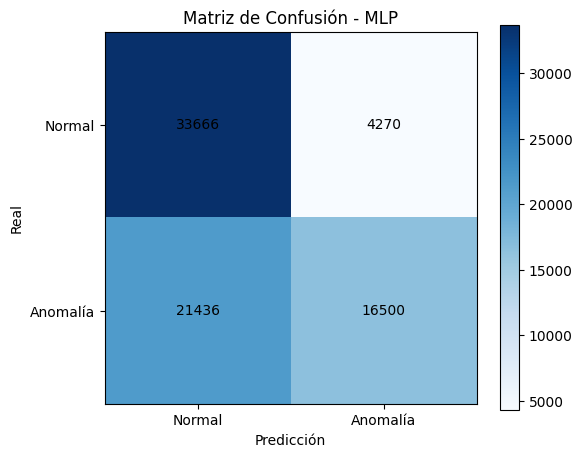


Modelo guardado como modelo_mlp.pkl


In [ ]:

X_train, y_train, X_test, y_test = ml.cargar_datos(
    "Cloud_Anomaly_Dataset_Train_Balanceado_E.csv",
    "Cloud_Anomaly_Dataset_Test_Balanceado_E.csv"
)

modelo, mejores_params = ml.entrenar_mlp(X_train, y_train)
print("Mejores hiperparámetros:", mejores_params)

y_pred, reporte, accuracy, cm = ml.evaluar_modelo(modelo, X_test, y_test)
print(reporte)
print("Accuracy:", accuracy)
print("Matriz de confusión:\n", cm)

ml.graficar_matriz_confusion(cm)

ml.guardar_modelo(modelo, "modelo_mlp.pkl")


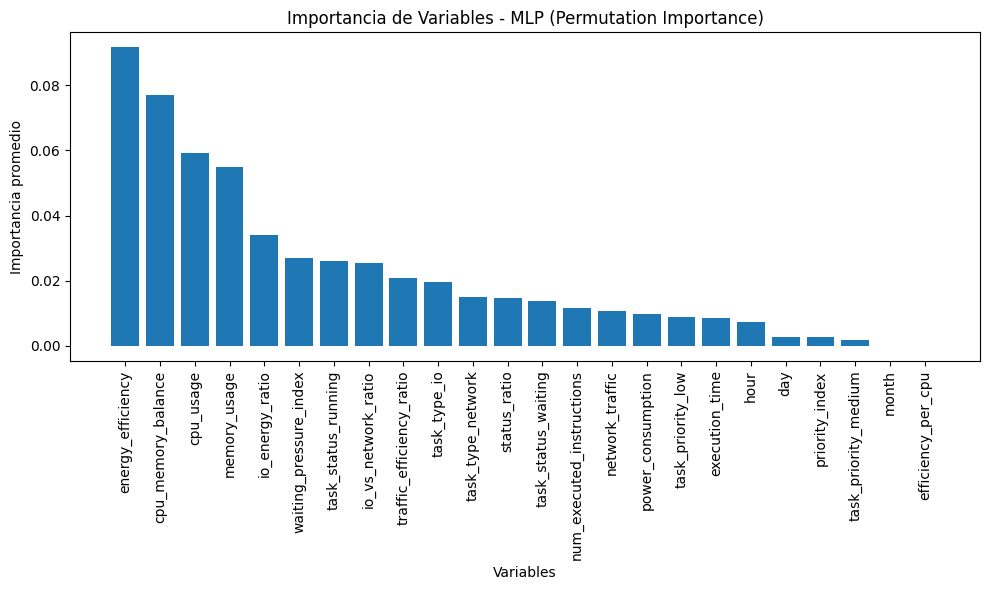

In [ ]:
import importancia as im

importances, indices, feature_names = im.obtener_importancia_variables(
    modelo, X_test, y_test
)

im.graficar_importancia_variables(importances, indices, feature_names)



====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.002
Accuracy: 0.7562
Precision: 0.7191
Recall clase 0 (No Anómala): 0.6717
Recall clase 1 (Anómala): 0.8407
----------------------------------------
Total de muestras: 75872
Anomalías predichas: 44349
No anomalías predichas: 31523
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.81      0.67      0.73     37936
     Anómala       0.72      0.84      0.78     37936

    accuracy                           0.76     75872
   macro avg       0.76      0.76      0.75     75872
weighted avg       0.76      0.76      0.75     75872

----------------------------------------
Matriz de confusión:
[[25480 12456]
 [ 6043 31893]]



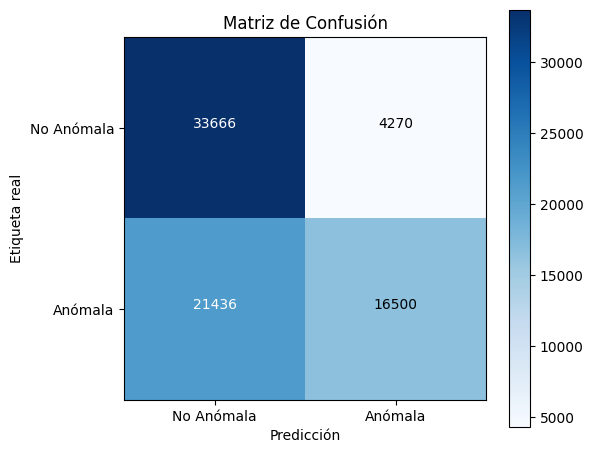

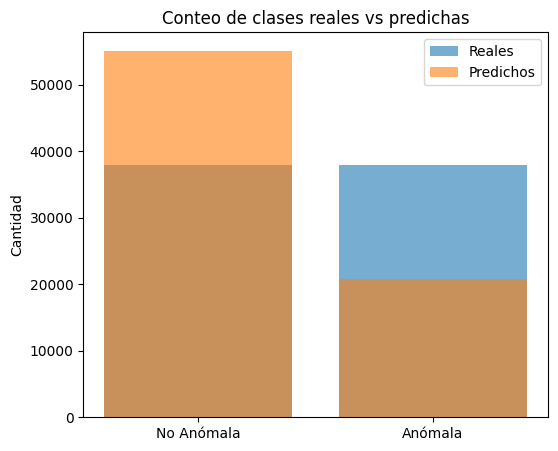

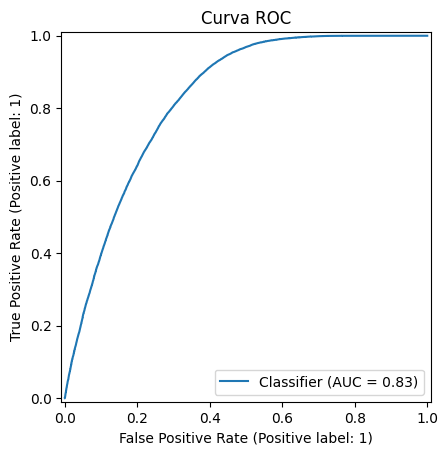

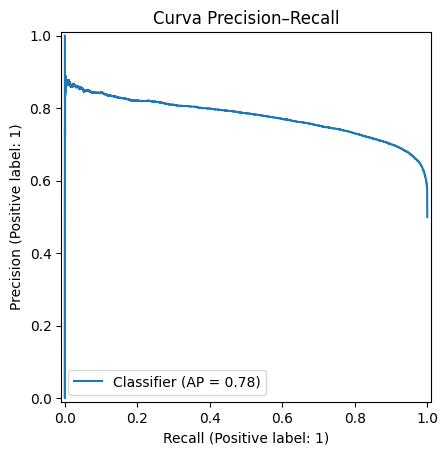

In [ ]:
import analisis_umbral as au  

modelo_path = 'modelo_mlp.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test_Balanceado_E.csv'

modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)
probs = au.calcular_probabilidades(modelo, X_test)
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
au.resumen_umbral(best_row, y_test, (probs >= t_use).astype(int))
au.graficar_todo(modelo, X_test, y_test)


### 5.2) Interpretación MLP

El modelo MLP, evaluado con un umbral optimizado de 0.002, demuestra una buena capacidad para distinguir entre tráfico normal y anómalo. La matriz de confusión y el reporte de métricas muestran que el modelo identifica correctamente una proporción importante de casos en ambas clases, con un recall del 84% para anomalías y 67% para tráfico normal, lo que indica que el modelo responde adecuadamente a la detección de comportamientos sospechosos.  

El rendimiento general se refleja en un accuracy del 76%, acompañado de valores equilibrados de precisión y F1-score. Las curvas ROC (AUC = 0.83) y Precision–Recall (AP = 0.78) respaldan que el modelo posee una buena capacidad discriminativa incluso bajo distintas condiciones de umbral. En conjunto, el modelo ofrece un desempeño consistente  para tareas de detección de anomalías en entornos de red.




# 4.3 ) Random Forest
El propósito de este modelo es ilustrar la aplicación práctica de técnicas de aprendizaje automático supervisado para la detección de anomalías en entornos de cómputo en la nube, utilizando el algoritmo Random Forest Classifier (Bosque Aleatorio).

Para el desarrollo se empleó el conjunto de datos Cloud_Anomaly_Dataset, que contiene métricas de rendimiento de instancias virtuales como uso de CPU, memoria, tráfico de red, consumo energético y otros atributos derivados de la carga de trabajo y el estado de las tareas.

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

import limpieza_y_balanceo as prep
import random_forest_anomalias as rf_mod
import analisis_umbral as au

%matplotlib inline


Se carga el conjunto de datos Cloud_Anomaly_Dataset, cuyo objetivo es detectar comportamientos anómalos en entornos de cómputo en la nube.

In [16]:
plt.ion()

df = pd.read_csv("Cloud_Anomaly_Dataset.csv")

print("Información del conjunto de datos Cloud_Anomaly_Dataset:\n")
print(df.info())

print("\nPrimeras filas del dataset:")
print(df.head())

Información del conjunto de datos Cloud_Anomaly_Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  object 
 12  Anomaly status             2

Se limpian los datos, y se genera un conjunto de entrenamiento balanceado a partir del dataset Cloud_Anomaly_Dataset. Para la evaluación, se preparan dos conjuntos de prueba: uno limpio y sin balancear, que refleja la distribución real de las clases, y otro balanceado, para analizar el comportamiento del modelo cuando las clases están equilibradas.

In [10]:
df = prep.cargar_y_limpieza("Cloud_Anomaly_Dataset.csv")
df = prep.codificar_categoricas(df)
df = prep.crear_variables_derivadas(df)
df = prep.rellenar_nulos(df)
df = prep.seleccionar_columnas(df)
X, y = prep.dividir_X_y(df)
X_train, X_test, y_train, y_test = prep.split_train_test(X, y)
print("Distribución antes del balanceo:")
print(y_train.value_counts())
X_train_res, y_train_res = prep.balancear_dataset(X_train, y_train)
print("Distribución después del balanceo (train):")
print(y_train_res.value_counts())
X_test_res, y_test_res = prep.balancear_dataset(X_test, y_test)
print("Distribución después del balanceo (test):")
print(y_test_res.value_counts())
prep.guardar_datasets(df, X_train_res, y_train_res, X_test, y_test, X_test_res, y_test_res)
print("Tamaño final (train balanceado):", X_train_res.shape)
print("Tamaño final (test balanceado):", X_test_res.shape)

c:\Users\oscar\Downloads\Entrega\limpieza_y_balanceo.py:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


Distribución antes del balanceo:
Anomaly status
0    208733
1     13323
Name: count, dtype: int64
Distribución después del balanceo (train):
Anomaly status
0    208733
1    208733
Name: count, dtype: int64
Distribución después del balanceo (test):
Anomaly status
0    52183
1    52183
Name: count, dtype: int64
Dataset de prueba balanceado guardado como 'Cloud_Anomaly_Dataset_Test_Balanceado.csv'
Archivos generados:
Cloud_Anomaly_Dataset_Limpio.csv
Cloud_Anomaly_Dataset_Train_Balanceado.csv
Cloud_Anomaly_Dataset_Test.csv
Cloud_Anomaly_Dataset_Test_Balanceado.csv
Tamaño final (train balanceado): (417466, 24)
Tamaño final (test balanceado): (104366, 24)


## Optimización de hiperparámetros del Random Forest

Se utilizará la clase **RandomForestClassifier** de `sklearn` para construir un modelo de clasificación.  
El modelo se entrenará con el conjunto de entrenamiento **balanceado** (`X_train_res`, `y_train_res`) y se evaluará con el conjunto de prueba **no balanceado** (`X_test`, `y_test`).  
Para la optimización de hiperparámetros se emplea **GridSearchCV**, utilizando validación cruzada y la métrica **F1-score** como criterio de selección.

### Valores que se usaron en la búsqueda de hiperparámetros:

- `n_estimators`: `[350, 400]`  
- `max_depth`: `[None, 10, 15]`  
- `min_samples_split`: `[2]`  
- `min_samples_leaf`: `[1]`  
- `criterion`: `['gini']`  
- `bootstrap`: `[True]`


Nulos en X_train: 0
Nulos en X_test: 0
Buscando los mejores hiperparámetros...
Fitting 2 folds for each of 6 candidates, totalling 12 fits

Mejores parámetros: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Mejor F1 en validación cruzada: 0.9433
Resultados completos guardados como 'Resultados_GridSearch_RF.csv'

Accuracy: 0.9212

Matriz de confusión:
 [[50858  1325]
 [ 3048   283]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     52183
           1       0.18      0.08      0.11      3331

    accuracy                           0.92     55514
   macro avg       0.56      0.53      0.54     55514
weighted avg       0.90      0.92      0.91     55514


Top variables del modelo:

                 Variable  Importancia
        energy_efficiency     0.220394
 traffic_efficiency_ratio     0.108476
           priority_index     0.09

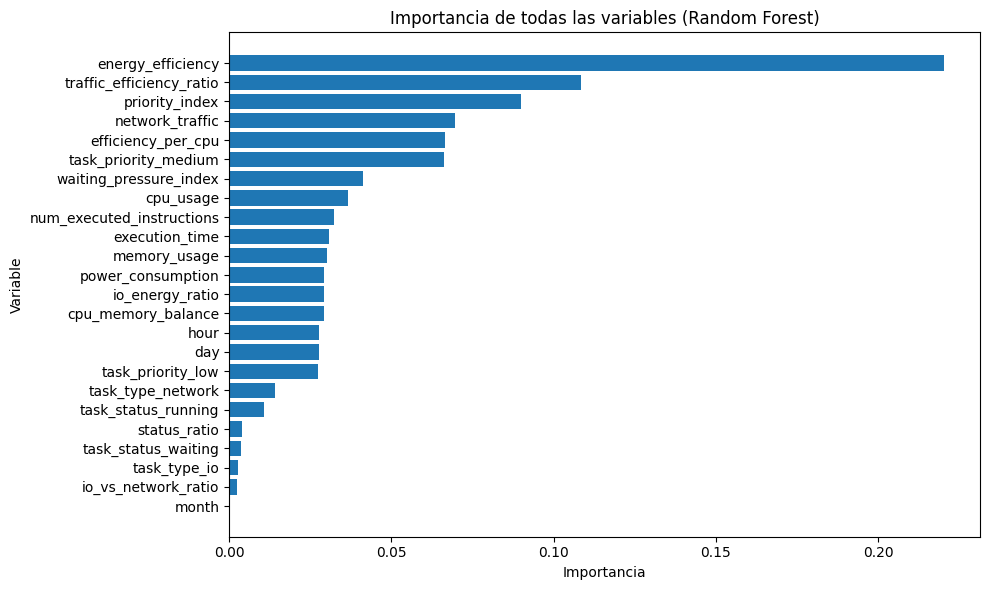

Modelo guardado como 'modelo_random_forest_optimo_todas.pkl'


In [4]:
X_train, X_test, y_train, y_test = rf_mod.cargar_datasets(
    'Cloud_Anomaly_Dataset_Train_Balanceado.csv',
    'Cloud_Anomaly_Dataset_Test.csv'
)

print("Nulos en X_train:", X_train.isnull().sum().sum())
print("Nulos en X_test:", X_test.isnull().sum().sum())

best_rf = rf_mod.entrenar_random_forest(X_train, y_train)
rf_mod.evaluar_modelo(best_rf, X_test, y_test)
rf_mod.importancia_variables(best_rf, X_train)
rf_mod.guardar_modelo(best_rf)

### 5.3) Interpretacion de resultdos de RandomForest

Al evaluar el modelo sobre el conjunto de prueba sin balancear, se obtuvo una accuracy de 92.12%, lo cual sugiere un rendimiento global elevado. Sin embargo, debido a que el problema es de detección de anomalías, el análisis debe enfocarse especialmente en el comportamiento sobre la clase 1 (Anomalía). En este punto se observa un patrón problemático similar al encontrado en el Árbol de Decisión entrenado bajo las mismas condiciones.

# Desempeño por Clase

-- **Clase 0 (No Anómala):**

- Precision: 0.94
- Recall: 0.97
- F1-score: 0.96

El modelo identifica casi todas las instancias normales y comete muy pocos errores de clasificación para esta clase, lo que evidencia una alta confiabilidad en la detección de comportamiento normal.

-- **Clase 1 (Anómala):**

- Precision: 0.18
- Recall: 0.08
- F1-score: 0.11

Aquí el desempeño se deteriora de manera considerable. El modelo solo logra identificar el 8% de las anomalías reales y, además, su precisión es muy baja: una gran parte de las instancias que predice como anómalas no lo son.

Este contraste extremo entre las métricas de ambas clases refleja que el modelo se encuentra fuertemente sesgado hacia la clase mayoritaria. Dado que las anomalías representan un porcentaje muy reducido del dataset original, el Random Forest aprende a priorizar la clasificación correcta de los registros normales, lo que conduce a un número preocupante de falsos negativos, como se aprecia en la matriz de confusión:

- Falsos negativos: 3.048
- Falsos positivos: 1.325

En un contexto de monitoreo de infraestructura cloud, dejar pasar anomalías sin detectar puede tener consecuencias críticas. Por lo tanto, a pesar de su alta accuracy, el desempeño del modelo en la clase minoritaria lo hace inadecuado para este tipo de tarea cuando se entrena con datos sin balancear.

Para encontar el mejor RECALL en ambas clases se tiene el siguiente codigo:


====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.157
Accuracy: 0.7310
Precision: 0.1642
Recall clase 0 (No Anómala): 0.7232
Recall clase 1 (Anómala): 0.8517
----------------------------------------
Total de muestras: 55514
Anomalías predichas: 17279
No anomalías predichas: 38235
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.99      0.72      0.83     52183
     Anómala       0.16      0.85      0.28      3331

    accuracy                           0.73     55514
   macro avg       0.58      0.79      0.56     55514
weighted avg       0.94      0.73      0.80     55514

----------------------------------------
Matriz de confusión:
[[37741 14442]
 [  494  2837]]



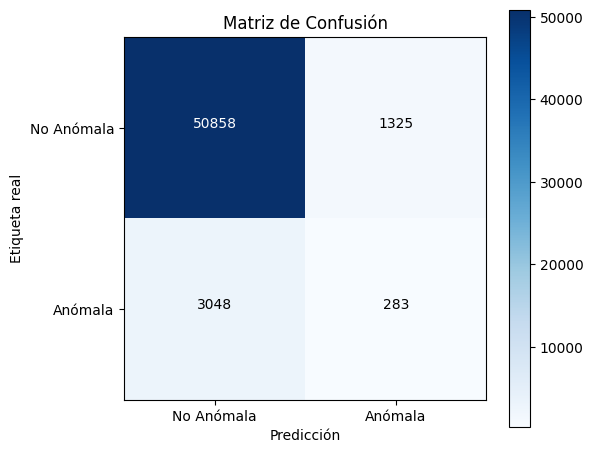

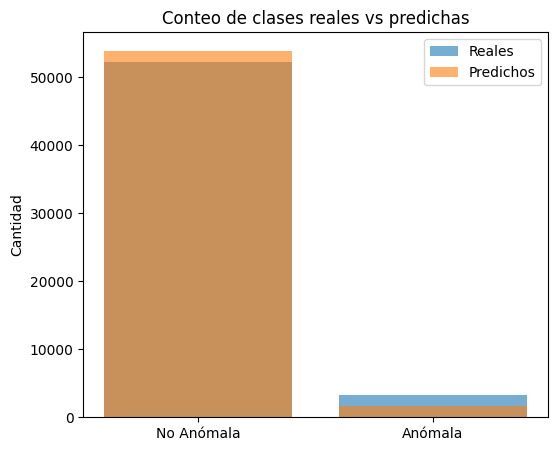

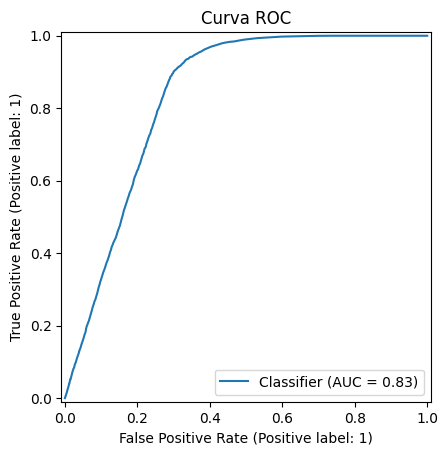

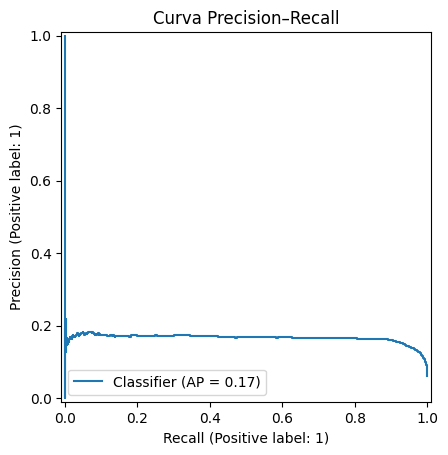

In [5]:
modelo_path = 'modelo_random_forest_optimo_todas.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test.csv'

modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)
probs = au.calcular_probabilidades(modelo, X_test)
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
preds_final, df_out = au.guardar_metricas_y_predicciones(df_res, probs, y_test, t_use)
au.resumen_umbral(best_row, y_test, preds_final)
au.graficar_todo(modelo, X_test, y_test)

**Interpretación para la matriz de confusión (gráfica 1)**
La matriz muestra que el modelo clasifica correctamente la mayoría de los casos No Anómalos, pero apenas detecta un pequeño porcentaje de anomalías. El bajo número de verdaderos positivos confirma que el desbalance afecta gravemente el rendimiento en la clase minoritaria.

**Interpretación para el conteo de clases reales vs predichas (gráfica 2)**

La gráfica revela que el modelo predice casi exclusivamente la clase No Anómala, reproduciendo el desbalance del conjunto de prueba. Esto es coherente con el bajo recall observado en la clase Anómala.

**Interpretación para la curva ROC (gráfica 3)**

El modelo obtiene un AUC de 0.83, lo que indica que a nivel probabilístico sí existe separación entre ambas clases. Sin embargo, este buen desempeño teórico no se refleja en la clasificación binaria debido al desbalance y al umbral por defecto.

**Interpretación para la curva Precision–Recall (gráfica 4)**

La curva PR muestra un AP de 0.17, lo que confirma la dificultad del modelo para lograr simultáneamente una buena precisión y buenas tasas de recuperación de anomalías. Esta métrica es más confiable que ROC en problemas desbalanceados y evidencia la debilidad del modelo.

### Conclusión
La evaluación del modelo Random Forest muestra que, con un umbral de 0.157, se obtiene un accuracy de 73,1%, lo que indica que aproximadamente tres cuartas partes de las predicciones totales son correctas. El recall de la clase anómala (85,2%) es alto, lo que significa que el modelo detecta la mayoría de las anomalías presentes, pero su precisión es muy baja (16,4%), evidenciando que hay muchos falsos positivos; es decir, muchas predicciones de anomalía no corresponden a casos reales. Por otro lado, la clase no anómala tiene alta precisión (99%), aunque su recall es más bajo (72,3%), lo que refleja que algunos casos normales se clasifican erróneamente como anomalías.

En conclusión, el modelo es efectivo para identificar anomalías, pero tiende a sobreestimar su presencia, generando falsos positivos. Para mejorar su desempeño, se balancio el test de prueba para que el modelo tenga una prueba más justa.

### RandonForest en conjunto de datos balanceado
Dado que el modelo mostró un desempeño deficiente para detectar anomalías en un conjunto de prueba desbalanceado, la estrategia fue entrenar el modelo nuevamente con un conjunto balanceado. donde tuvo mejores resultados


====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.387
Accuracy: 0.8970
Precision: 0.9305
Recall clase 0 (No Anómala): 0.9359
Recall clase 1 (Anómala): 0.8581
----------------------------------------
Total de muestras: 104366
Anomalías predichas: 48122
No anomalías predichas: 56244
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.87      0.94      0.90     52183
     Anómala       0.93      0.86      0.89     52183

    accuracy                           0.90    104366
   macro avg       0.90      0.90      0.90    104366
weighted avg       0.90      0.90      0.90    104366

----------------------------------------
Matriz de confusión:
[[48837  3346]
 [ 7407 44776]]



<Figure size 600x500 with 0 Axes>

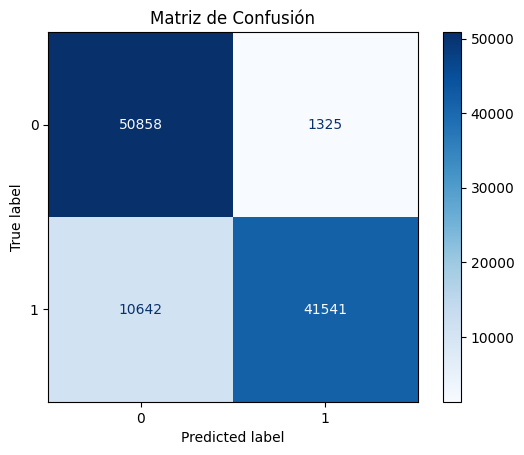

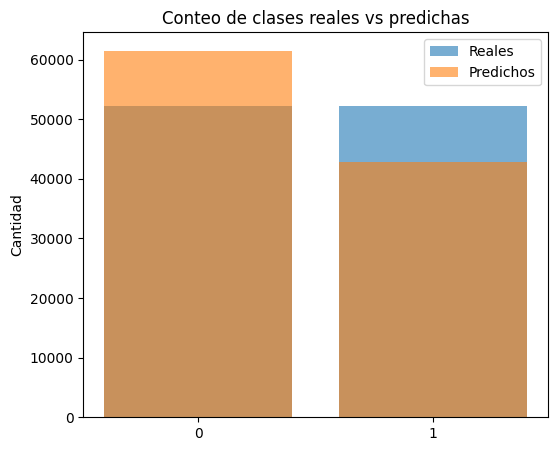

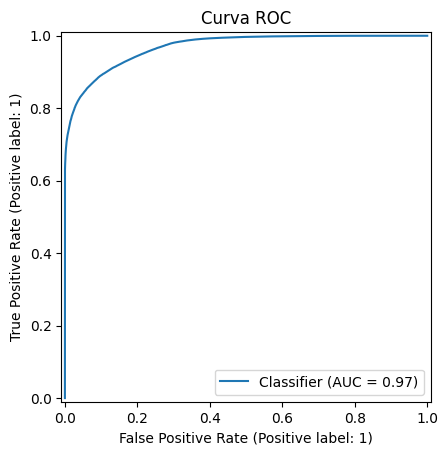

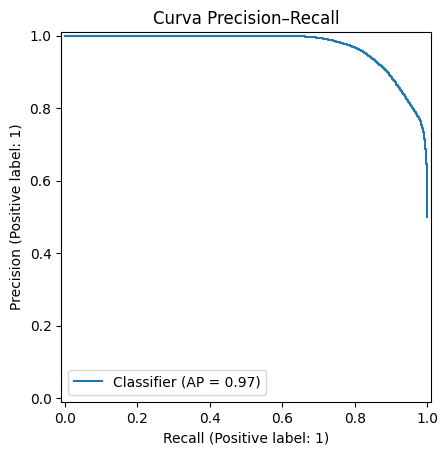

In [7]:
modelo_path = 'modelo_random_forest_optimo_todas.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test_Balanceado.csv'


modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)
probs = au.calcular_probabilidades(modelo, X_test)
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
preds_final, df_out = au.guardar_metricas_y_predicciones(df_res, probs, y_test, t_use)
au.resumen_umbral(best_row, y_test, preds_final)
au.graficar_todo(modelo, X_test, y_test)

**Interpretación para la matriz de confusión (gráfica 1)**

La matriz evidencia que, tras el balanceo del conjunto de entrenamiento, el modelo ahora identifica correctamente una gran proporción tanto de casos No Anómalos como de Anómalos. El número de verdaderos positivos es sustancialmente mayor respecto al conjunto previo, lo que indica que el modelo ya no ignora la clase minoritaria. Además, los falsos negativos disminuyen notablemente, reflejando que el modelo ha aprendido patrones relevantes para detectar anomalías de forma mucho más efectiva.

**Interpretación para el conteo de clases reales vs predichas (gráfica 2)**

En esta gráfica se observa que las cantidades de clases predichas se distribuyen de manera mucho más similar a las clases reales, a diferencia del escenario previo en el que el modelo reproducía casi completamente el desbalance original. Aquí el modelo predice ambas clases con proporciones coherentes, lo que confirma que dejó de sesgarse hacia la clase No Anómala y aprovecha adecuadamente el balance logrado durante el entrenamiento.

**Interpretación para la curva ROC (gráfica 3)**

La curva ROC muestra un AUC cercano a 0.97, lo que representa una mejora notable respecto al conjunto previo. Esto refleja una separación muy clara entre anomalías y datos normales en el espacio probabilístico del modelo. A diferencia de antes, este buen desempeño teórico sí se refleja en las predicciones reales, apoyado por el mejor equilibrio entre clases durante el entrenamiento.

**Interpretación para la curva Precision–Recall (gráfica 4)**

La curva Precision–Recall presenta un AP alrededor de 0.97, lo que constituye una mejora extrema comparado con los resultados del conjunto anterior. Esta métrica, especialmente adecuada para problemas desbalanceados, confirma que ahora el modelo es capaz de mantener simultáneamente alta precisión y alta tasa de recuperación de anomalías. El balanceo del dataset permitió que el modelo aprendiera a distinguir de manera confiable los casos positivos, reduciendo tanto los falsos positivos como los falsos negativos.

### Conclusión
En este test balanceado, el modelo Random Forest alcanzó un accuracy de 89,7%, mostrando un desempeño general muy bueno al clasificar por igual casos normales y anómalos. La precisión y recall de la clase anómala (93,1% y 85,8% respectivamente) indican que la mayoría de las anomalías se detectan correctamente y que las predicciones de anomalías son confiables. Para la clase no anómala, la precisión y recall también son altas (87% y 93,6%), lo que refleja un buen equilibrio en la detección de ambos tipos de casos.

La matriz de confusión confirma que, en este escenario balanceado, los falsos positivos y falsos negativos están relativamente controlados, mejorando significativamente frente al test no balanceado. En conclusión, el balanceo de clases permite al modelo identificar anomalías y casos normales de manera más equitativa, mejorando la precisión general y la capacidad de detección de anomalías sin sacrificar la detección de la clase mayoritaria.

# 4.4) Regresión Logística Binaria

El propósito de este modelo es ilustrar la aplicación práctica de técnicas de aprendizaje automático supervisado para la detección de anomalías en entornos de cómputo en la nube, utilizando el algoritmo de Regresión Logística Binaria.

Para el desarrollo se empleó el conjunto de datos Cloud_Anomaly_Dataset, que contiene métricas de rendimiento de instancias virtuales como uso de CPU, memoria, tráfico de red, consumo energético y otros atributos derivados de la carga de trabajo y el estado de las tareas. El modelo busca predecir si una instancia presenta o no anomalías, tratando el problema como una clasificación binaria, y se aplican técnicas de preprocesamiento como escalado de variables y balanceo de clases para mejorar la capacidad predictiva.

In [11]:

import pandas as pd
import matplotlib.pyplot as plt

import limpieza_y_balanceoescalado as prep2
import regresion_binaria as rb
import analisis_umbral as au

%matplotlib inline


Se carga el conjunto de datos Cloud_Anomaly_Dataset, cuyo objetivo es detectar comportamientos anómalos en entornos de cómputo en la nube.

In [4]:
plt.ion()

df = pd.read_csv("Cloud_Anomaly_Dataset.csv")

print("Información del conjunto de datos Cloud_Anomaly_Dataset:\n")
print(df.info())

print("\nPrimeras filas del dataset:")
print(df.head())

Información del conjunto de datos Cloud_Anomaly_Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  object 
 12  Anomaly status             2

Se limpian y escalan los datos, y se genera un conjunto de entrenamiento balanceado a partir del dataset Cloud_Anomaly_Dataset. Para la evaluación, se utilizará el conjunto de prueba balanceado, que permite analizar el comportamiento del modelo cuando las clases están equilibradas.

In [17]:
df = prep2.cargar_y_limpieza("Cloud_Anomaly_Dataset.csv")
df = prep2.codificar_categoricas(df)
df = prep2.crear_variables_derivadas(df)
df = prep2.rellenar_nulos(df)
df = prep2.seleccionar_columnas(df)

X, y = prep2.dividir_X_y(df)
X_train, X_test, y_train, y_test = prep2.split_train_test(X, y)

X_train_scaled, X_test_scaled = prep2.escalar_variables(X_train, X_test)

print("NaNs en X_train_scaled:", X_train_scaled.isna().sum().sum())
print("NaNs en X_test_scaled:", X_test_scaled.isna().sum().sum())

print("Distribución en entrenamiento (sin balancear):")
print(y_train.value_counts())

X_train_res, y_train_res = prep2.balancear_dataset(X_train_scaled, y_train)
X_test_res, y_test_res = prep2.balancear_dataset(X_test_scaled, y_test)

print("Distribución en entrenamiento (balanceado):")
print(y_train_res.value_counts())
print("Distribución en test (balanceado):")
print(y_test_res.value_counts())

prep2.guardar_datasets_balanceados(
    X_train_res, y_train_res, X_test_res, y_test_res
)

print(f"X_train_res: {X_train_res.shape}, X_test_res: {X_test_res.shape}")
print("Proceso completado")

c:\Users\oscar\Downloads\Entrega\limpieza_y_balanceoescalado.py:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


NaNs en X_train_scaled: 0
NaNs en X_test_scaled: 0
Distribución en entrenamiento (sin balancear):
Anomaly status
0    151742
1      9785
Name: count, dtype: int64
Distribución en entrenamiento (balanceado):
Anomaly status
0    151742
1    151742
Name: count, dtype: int64
Distribución en test (balanceado):
Anomaly status
0    37936
1    37936
Name: count, dtype: int64

Archivos balanceados generados correctamente:
 - Cloud_Anomaly_Dataset_Train_Balanceado_E.csv
 - Cloud_Anomaly_Dataset_Test_Balanceado_E.csv
X_train_res: (303484, 24), X_test_res: (75872, 24)
Proceso completado



## Optimización de hiperparámetros de la Regresión Logística

Se utilizará la clase **LogisticRegression** de `sklearn` para construir un modelo de clasificación.
El modelo se entrenará con el conjunto de entrenamiento **balanceado** (`X_train`, `y_train`) y se evaluará con el conjunto de prueba **balanceado** (`X_test`, `y_test`).
Para la optimización de hiperparámetros se emplea **GridSearchCV**, utilizando validación cruzada y la métrica **F1-score** como criterio de selección.

### Valores que se usaron en la búsqueda de hiperparámetros:

* `C`: `[0.1, 1, 10]`
* `solver`: `['lbfgs', 'liblinear']`
* `class_weight`: `['balanced']`
* `max_iter`: `[500, 1000]`

Nulos en X_train: 0
Nulos en X_test: 0
Buscando los mejores hiperparámetros para Regresión Logística Binaria...
Fitting 2 folds for each of 12 candidates, totalling 24 fits

Mejores parámetros: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'solver': 'liblinear'}
Mejor F1 en validación cruzada: 0.7897
Resultados completos guardados como 'Resultados_GridSearch_LogReg_Binaria.csv'

Accuracy: 0.784

Matriz de confusión:
 [[27140 10796]
 [ 5589 32347]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77     37936
           1       0.75      0.85      0.80     37936

    accuracy                           0.78     75872
   macro avg       0.79      0.78      0.78     75872
weighted avg       0.79      0.78      0.78     75872


Top variables del modelo:

                 Variable  Importancia
        energy_efficiency     1.381589
       efficiency_per_cpu     0.432332
      task_status_running     0.342470

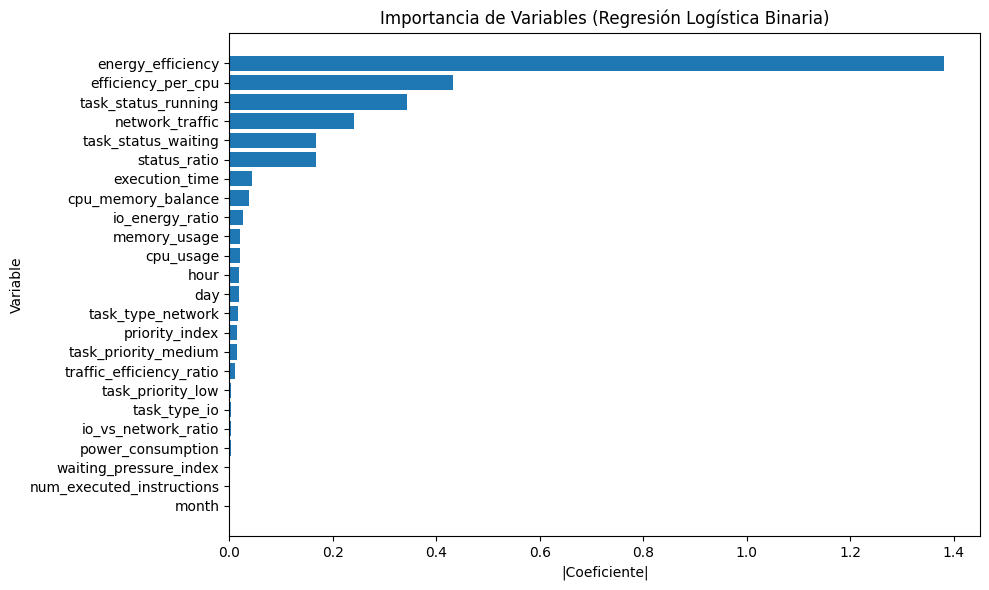

Modelo guardado como 'modelo_logistic_regression_binaria.pkl'


In [6]:
X_train, X_test, y_train, y_test = rb.cargar_datasets(
    'Cloud_Anomaly_Dataset_Train_Balanceado_E.csv',
    'Cloud_Anomaly_Dataset_Test_Balanceado_E.csv'
)

print("Nulos en X_train:", X_train.isnull().sum().sum())
print("Nulos en X_test:", X_test.isnull().sum().sum())

best_rb = rb.entrenar_logistic_regression_binaria(X_train, y_train)
rb.evaluar_modelo(best_rb, X_test, y_test)
rb.importancia_variables(best_rb, X_train)
rb.guardar_modelo(best_rb)

Para encontar el mejor RECALL en amabas clase se tiene el siguiente codigo:


====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.512
Accuracy: 0.7837
Precision: 0.7540
Recall clase 0 (No Anómala): 0.7253
Recall clase 1 (Anómala): 0.8421
----------------------------------------
Total de muestras: 75872
Anomalías predichas: 42366
No anomalías predichas: 33506
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.82      0.73      0.77     37936
     Anómala       0.75      0.84      0.80     37936

    accuracy                           0.78     75872
   macro avg       0.79      0.78      0.78     75872
weighted avg       0.79      0.78      0.78     75872

----------------------------------------
Matriz de confusión:
[[27516 10420]
 [ 5990 31946]]



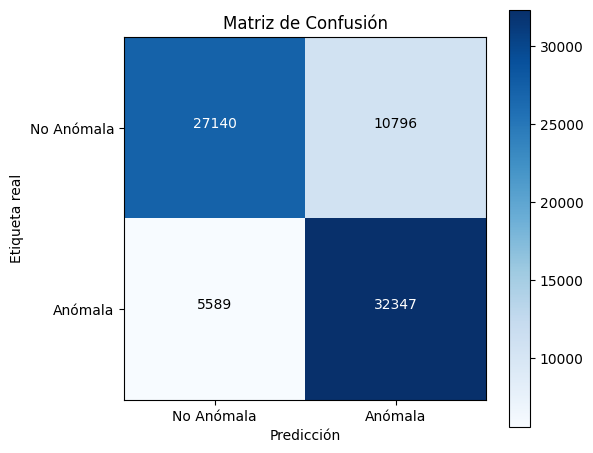

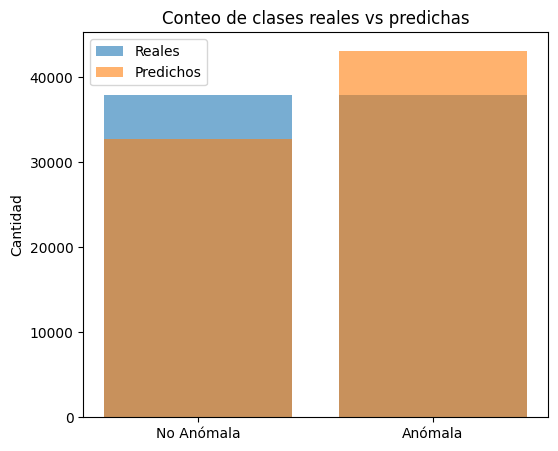

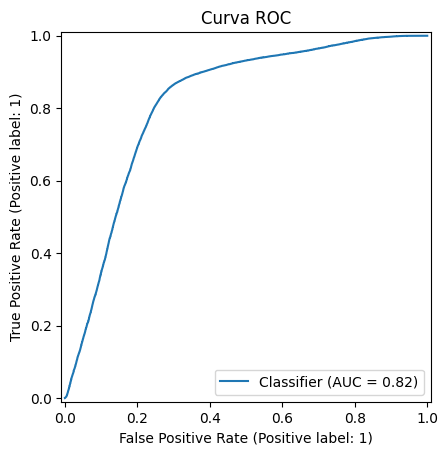

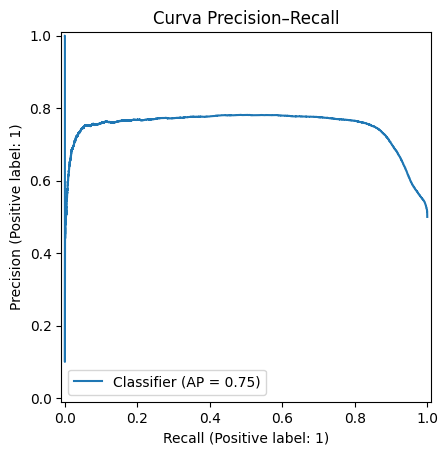

In [18]:
modelo_path = 'modelo_logistic_regression_binaria.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test_Balanceado_E.csv'

modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)
probs = au.calcular_probabilidades(modelo, X_test)
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
preds_final, df_out = au.guardar_metricas_y_predicciones(df_res, probs, y_test, t_use)
au.resumen_umbral(best_row, y_test, preds_final)
au.graficar_todo(modelo, X_test, y_test)

# 5.4) Interpretacion regresion logistica binaria

#### Interpretación para la matriz de confusión (gráfica 1).

La matriz muestra que el modelo identifica correctamente una cantidad considerable de instancias tanto No Anómalas como Anómalas. Los valores observados son:

- Verdaderos Negativos (No Anómala → No Anómala): 27 140

- Falsos Positivos (No Anómala → Anómala): 10 796

- Falsos Negativos (Anómala → No Anómala): 5 589

- Verdaderos Positivos (Anómala → Anómala): 32 347

El modelo demuestra una buena capacidad para detectar anomalías, ya que el número de verdaderos positivos es elevado. Aunque la cantidad de falsos positivos es significativa, el número más bajo de falsos negativos sugiere que el sistema tiende a evitar dejar pasar una anomalía real como normal. Este comportamiento es común y aceptable en contextos donde es preferible sobredetectar eventos anómalos antes que ignorarlos.

#### Interpretación para el conteo de clases reales vs predichas (gráfica 2).

La gráfica de conteo evidencia que la distribución real de clases está aproximadamente equilibrada entre No Anómala y Anómala, mientras que las predicciones muestran:

- Una ligera subpredicción de la clase No Anómala.

- Una sobredetección de la clase Anómala, donde el modelo predice más anomalías de las que realmente existen.

Esta diferencia coincide con los valores de la matriz de confusión, donde se aprecia un volumen considerable de falsos positivos. No obstante, la relación entre clases reales y predichas no está desbalanceada de forma extrema, lo que indica que el modelo conserva parte del equilibrio aprendido durante el entrenamiento, aunque prioriza la detección de anomalías.

#### Interpretación para la curva ROC (gráfica 3).

La curva ROC presenta un AUC de 0.82, lo que indica una capacidad adecuada para diferenciar entre clases Anómala y No Anómala. El modelo logra, en la mayoría de los casos, asignar una probabilidad mayor a una instancia anómala frente a una normal.

Un AUC de este valor implica que el modelo podría mejorar, pero aun así ofrece un rendimiento consistente y útil para la tarea de clasificación. El comportamiento observado sugiere una separación razonable entre ambas clases en el espacio probabilístico.

#### Interpretación para la curva Precision–Recall (gráfica 4).

La curva Precision–Recall muestra un Average Precision (AP) aproximado de 0.75. Este valor es coherente con la presencia de falsos positivos en la matriz de confusión. Aun así, la forma de la curva refleja que el modelo mantiene una precisión relativamente alta a lo largo de amplios rangos de recall.

Este comportamiento indica que el modelo es capaz de recuperar un gran número de anomalías sin que la precisión caiga de forma abrupta, lo que es especialmente relevante en tareas donde la clase positiva (Anómala) es de mayor interés. Aunque la precisión no es perfecta, el modelo logra un equilibrio razonable entre detectar la mayor cantidad de anomalías posible y mantener controlado el volumen de alertas incorrectas.

### Conclusión
La evaluación del modelo de Regresión Logística Binaria muestra un desempeño sólido en la clasificación de anomalías. Con un accuracy de 78,37% y un umbral óptimo de 0,512, el modelo logra un recall de 84,21% para la clase anómala y de 72,53% para la clase no anómala, indicando que identifica correctamente la mayoría de las anomalías mientras mantiene un desempeño razonable en la clase normal.

La precisión de 75,40% refleja que aproximadamente tres cuartas partes de las predicciones de anomalías son correctas. La matriz de confusión muestra que el modelo predice correctamente muchas muestras de ambas clases, aunque todavía existen falsos positivos y falsos negativos.

Sin embargo, al ser un modelo lineal, la regresión logística no puede capturar relaciones complejas no lineales como lo hace un modelo de Random Forest. Por lo tanto, aunque ofrece interpretabilidad y un equilibrio razonable entre sensibilidad y especificidad, su desempeño no puede igualar al de un Random Forest en escenarios donde las relaciones entre variables son más complejas.

# 4.5) DNN 
El propósito de este modelo es ilustrar la aplicación práctica de técnicas de aprendizaje profundo supervisado para la detección de anomalías en entornos de cómputo en la nube, utilizando una Red Neuronal Profunda (DNN).

Para el desarrollo se empleó el conjunto de datos Cloud_Anomaly_Dataset, que contiene métricas de rendimiento de instancias virtuales como uso de CPU, memoria, tráfico de red, consumo energético y otros atributos derivados de la carga de trabajo y el estado de las tareas.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

import limpieza_y_balanceoescalado as prep3
import dnn as dn
import analisis_umbral as au

%matplotlib inline

Se carga el conjunto de datos Cloud_Anomaly_Dataset, cuyo objetivo es detectar comportamientos anómalos en entornos de cómputo en la nube.

In [23]:
plt.ion()

df = pd.read_csv("Cloud_Anomaly_Dataset.csv")

print("Información del conjunto de datos Cloud_Anomaly_Dataset:\n")
print(df.info())

print("\nPrimeras filas del dataset:")
print(df.head())

Información del conjunto de datos Cloud_Anomaly_Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  object 
 12  Anomaly status             2

Se limpian y escalan los datos, y se genera un conjunto de entrenamiento balanceado a partir del dataset Cloud_Anomaly_Dataset. Para la evaluación, se utilizará el conjunto de prueba balanceado, que permite analizar el comportamiento del modelo cuando las clases están equilibradas.

In [24]:
df = prep3.cargar_y_limpieza("Cloud_Anomaly_Dataset.csv")
df = prep3.codificar_categoricas(df)
df = prep3.crear_variables_derivadas(df)
df = prep3.rellenar_nulos(df)
df = prep3.seleccionar_columnas(df)

X, y = prep3.dividir_X_y(df)
X_train, X_test, y_train, y_test = prep3.split_train_test(X, y)

X_train_scaled, X_test_scaled = prep3.escalar_variables(X_train, X_test)

print("NaNs en X_train_scaled:", X_train_scaled.isna().sum().sum())
print("NaNs en X_test_scaled:", X_test_scaled.isna().sum().sum())

print("Distribución en entrenamiento (sin balancear):")
print(y_train.value_counts())

X_train_res, y_train_res = prep3.balancear_dataset(X_train_scaled, y_train)
X_test_res, y_test_res = prep3.balancear_dataset(X_test_scaled, y_test)

print("Distribución en entrenamiento (balanceado):")
print(y_train_res.value_counts())
print("Distribución en test (balanceado):")
print(y_test_res.value_counts())

prep3.guardar_datasets_balanceados(
    X_train_res, y_train_res, X_test_res, y_test_res
)

print(f"X_train_res: {X_train_res.shape}, X_test_res: {X_test_res.shape}")
print("Proceso completado")

c:\Users\oscar\Downloads\Entrega\limpieza_y_balanceoescalado.py:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


NaNs en X_train_scaled: 0
NaNs en X_test_scaled: 0
Distribución en entrenamiento (sin balancear):
Anomaly status
0    151742
1      9785
Name: count, dtype: int64
Distribución en entrenamiento (balanceado):
Anomaly status
0    151742
1    151742
Name: count, dtype: int64
Distribución en test (balanceado):
Anomaly status
0    37936
1    37936
Name: count, dtype: int64

Archivos balanceados generados correctamente:
 - Cloud_Anomaly_Dataset_Train_Balanceado_E.csv
 - Cloud_Anomaly_Dataset_Test_Balanceado_E.csv
X_train_res: (303484, 24), X_test_res: (75872, 24)
Proceso completado


## Optimización de hiperparámetros de la DNN

Se utilizará la clase **KerasClassifier** de `scikeras.wrappers` para construir un modelo de **Red Neuronal Profunda (DNN)**.  
El modelo se entrenará con el conjunto de entrenamiento **balanceado** (`X_train`, `y_train`) y se evaluará con el conjunto de prueba **balanceado** (`X_test`, `y_test`).  
Para la optimización de hiperparámetros se emplea **GridSearchCV**, utilizando validación cruzada y la métrica **F1-score** como criterio de selección.

### Valores que se usaron en la búsqueda de hiperparámetros:

* `model__n_layers`: `[1, 3]`  
* `model__n_neurons`: `[10]`  
* `model__dropout_rate`: `[0.2]`  
* `model__lr` (learning rate): `[0.001, 0.0005]`  
* `epochs`: `[20]`  
* `batch_size`: `[32]`  

Nulos en X_train: 0
Nulos en X_test: 0
Buscando los mejores hiperparámetros...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Mejores parámetros encontrados: {'batch_size': 32, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__lr': 0.0005, 'model__n_layers': 3, 'model__n_neurons': 10}
Mejor F1 en validación cruzada: 0.0869

--- Resultados del modelo ---
Accuracy: 0.7999
Matriz de confusión:
 [[27435 10501]
 [ 4682 33254]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78     37936
           1       0.76      0.88      0.81     37936

    accuracy                           0.80     75872
   macro avg       0.81      0.80      0.80     75872
weighted avg       0.81      0.80      0.80     75872


Top variables según importancia:
                 Variable  Importancia
        energy_efficiency     0.280657
             status_ratio     0.017900
      task_status_running     0.016555
      task_status_

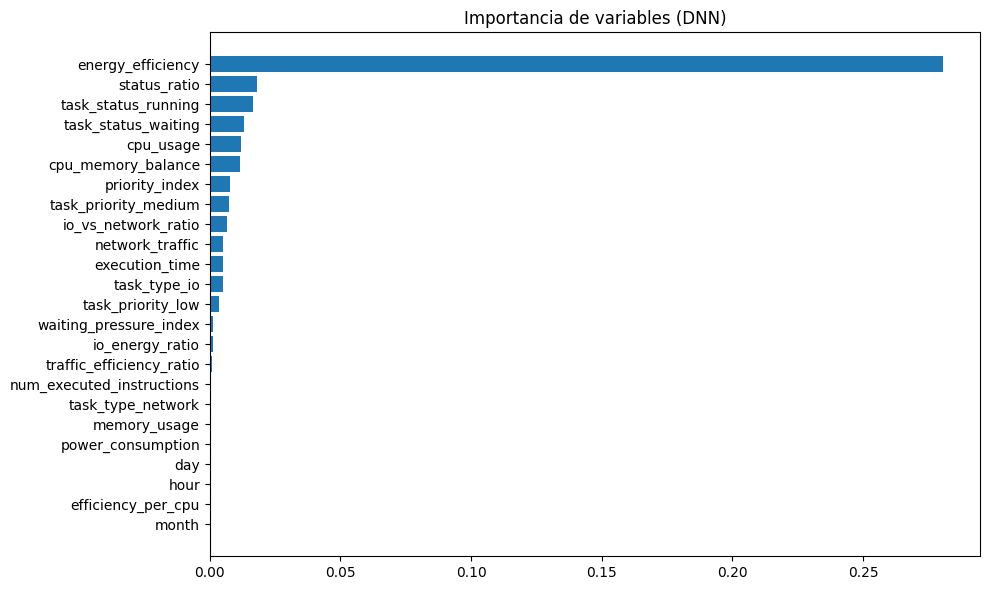

Modelo guardado como 'modelo_dnn_optimo.pkl'


In [27]:
X_train, X_test, y_train, y_test = dn.cargar_datasets(
    'Cloud_Anomaly_Dataset_Train_Balanceado_E.csv',
    'Cloud_Anomaly_Dataset_Test_Balanceado_E.csv'
)

print("Nulos en X_train:", X_train.isnull().sum().sum())
print("Nulos en X_test:", X_test.isnull().sum().sum())

best_dnn = dn.entrenar_dnn(X_train, y_train)
dn.evaluar_modelo(best_dnn, X_test, y_test)
dn.importancia_variables(best_dnn, X_train, y_train)
dn.guardar_modelo(best_dnn, nombre_archivo="modelo_dnn_optimo.pkl")

Para encontar el mejor RECALL en amabas clase se tiene el siguiente codigo:


====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.015
Accuracy: 0.7892
Precision: 0.7281
Recall clase 0 (No Anómala): 0.6553
Recall clase 1 (Anómala): 0.9231
----------------------------------------
Total de muestras: 75872
Anomalías predichas: 48095
No anomalías predichas: 27777
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.90      0.66      0.76     37936
     Anómala       0.73      0.92      0.81     37936

    accuracy                           0.79     75872
   macro avg       0.81      0.79      0.79     75872
weighted avg       0.81      0.79      0.79     75872

----------------------------------------
Matriz de confusión:
[[24861 13075]
 [ 2916 35020]]



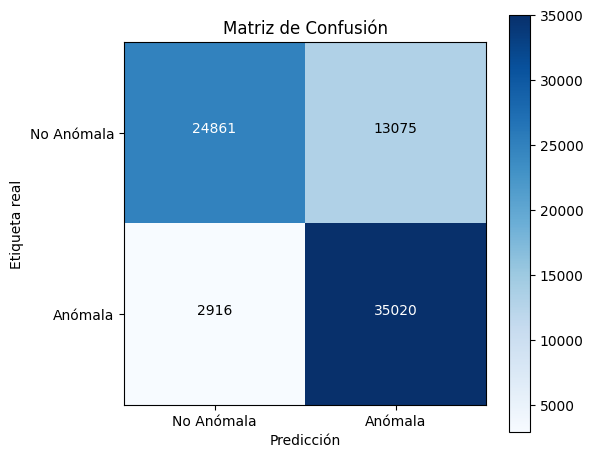

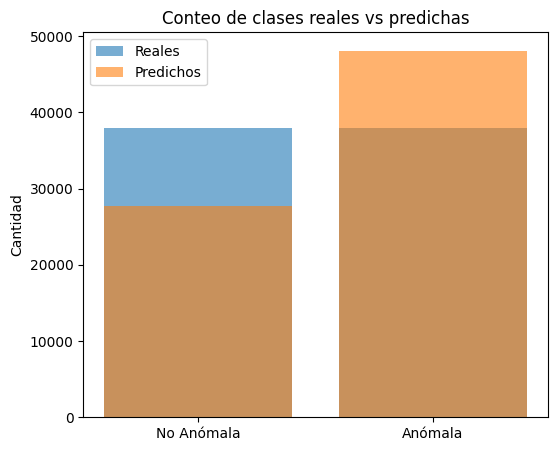

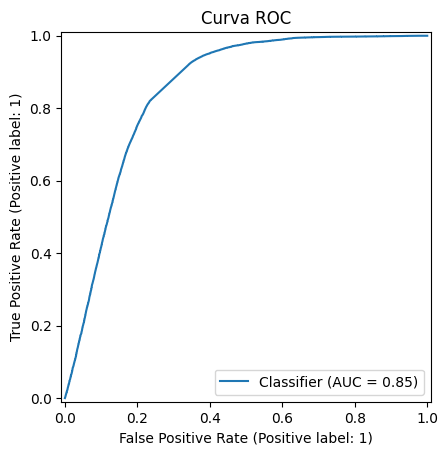

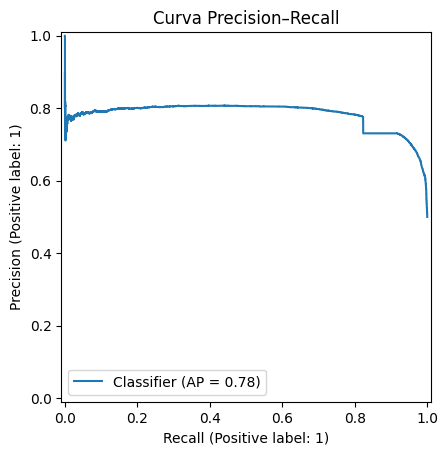

In [2]:
from dnn import crear_modelo
import joblib

modelo_path = 'modelo_dnn_optimo.pkl'
modelo = joblib.load(modelo_path)

test_csv = 'Cloud_Anomaly_Dataset_Test_Balanceado_E.csv'
df_test = pd.read_csv(test_csv)

X_test, y_test = au.preparar_X_y_test_dnn(df_test)
probs = au.calcular_probabilidades_dnn(modelo, X_test)

df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
preds_final, df_out = au.guardar_metricas_y_predicciones(df_res, probs, y_test, t_use)
au.resumen_umbral(best_row, y_test, preds_final)
au.graficar_todo(modelo, X_test, y_test)


# 5.5) Interpretacion DNN

#### Interpretación de la Matriz de Confusión(Grafica 1).

La matriz muestra que el modelo distingue razonablemente bien entre instancias Anómalas y No Anómalas. Los valores observados son:

- Verdaderos Negativos (No Anómala → No Anómala): 24 861

- Falsos Positivos (No Anómala → Anómala): 13 075

- Falsos Negativos (Anómala → No Anómala): 2 916

- Verdaderos Positivos (Anómala → Anómala): 35 020

El modelo presenta una alta capacidad para detectar anomalías, evidenciada por el gran número de verdaderos positivos. Aunque existe un volumen considerable de falsos positivos, los falsos negativos son relativamente bajos, lo que indica que el sistema prefiere marcar eventos como anómalos antes que dejar pasar una anomalía real, un comportamiento deseable en tareas donde el error de omitir anomalías es costoso.

#### Interpretación del Conteo de Clases Reales vs Predichas(Grafica 2)

La gráfica muestra que las clases reales están distribuidas de forma casi equilibrada entre No Anómala y Anómala. Sin embargo, las predicciones presentan:

- Subpredicción de la clase No Anómala (el modelo marca menos normales de las que realmente hay).

- Sobrepredicción de la clase Anómala (el modelo detecta más anomalías de las reales).

Este comportamiento coincide con los falsos positivos elevados observados en la matriz de confusión. Aun así, el modelo no está completamente desbalanceado: conserva una relación relativamente estable entre ambas clases, aunque claramente prioriza la detección de la clase Anómala, lo cual es coherente con su utilización en un contexto de vigilancia o detección de riesgos.

#### Interpretación de la Curva ROC(Grafica 3).

La curva ROC exhibe un valor de AUC = 0.85, lo que indica que el modelo tiene una buena capacidad para distinguir entre instancias Anómalas y No Anómalas.

Un AUC de este nivel implica que, en aproximadamente 85% de los casos, una instancia anómala recibe una puntuación mayor que una normal. La curva muestra una tendencia ascendente sólida, con una separación clara entre ambas clases en el espacio de probabilidades. Esto significa que el clasificador es consistente y útil, aunque todavía existe margen para optimizar su discriminación, especialmente reduciendo falsos positivos.

### Interpretación para la curva Precision–Recall(Grafica 4).

La curva Precision–Recall muestra un Average Precision (AP) aproximado de 0.78. Este valor indica un rendimiento sólido del modelo, reflejando que, aunque existen falsos positivos, la precisión se mantiene estable en la mayor parte del rango de recall.

La forma de la curva evidencia que el modelo conserva una precisión relativamente alta incluso cuando aumenta la recuperación de la clase positiva. Solo en los valores más altos de recall se observa una disminución más marcada, lo cual es esperable, ya que recuperar casi todas las anomalías suele implicar un incremento en falsos positivos.

Este comportamiento indica que el modelo es capaz de identificar un gran número de anomalías sin que la precisión se deteriore de manera abrupta. Esto resulta especialmente importante en contextos donde la detección de la clase Anómala es prioritaria. Aunque la precisión no es perfecta, el modelo logra un equilibrio adecuado entre recuperar la mayor cantidad posible de anomalías y mantener un nivel controlado de predicciones incorrectas.

### Conclusión

El modelo de Red Neuronal Profunda (DNN) muestra un desempeño sólido en la detección de anomalías. Con un accuracy de 78,92% y un umbral óptimo de 0,015, el modelo alcanza un recall de 92,31% para la clase anómala, lo que indica que es capaz de identificar la gran mayoría de las anomalías, mientras que para la clase no anómala el recall es de 65,53%, mostrando que algunos casos normales se clasifican erróneamente como anómalos.

La precisión global es de 72,81%, lo que refleja que la mayoría de las predicciones de anomalías son correctas, aunque existe cierta proporción de falsos positivos. La matriz de confusión confirma que el modelo identifica bien las anomalías, con un número relativamente bajo de falsos negativos (2.916), pero con un mayor número de falsos positivos (13.075) sobre la clase normal.

En general, la DNN es efectiva para detectar anomalías debido a su capacidad para capturar relaciones complejas no lineales entre variables, lo que la hace especialmente útil en escenarios con interacciones complejas, aunque a costa de un menor desempeño en la predicción de la clase normal comparado con modelos más interpretables.

### III ) Comparación de metodos usados y conclusiones

# 6) Resumen de los resultados de los modelos

Para analizar el rendimiento de los diferentes modelos entrenados, se presentan a continuación varias tablas comparativas que resumen sus métricas de evaluación. Estas tablas permiten observar cómo se comporta cada método tanto sobre los datos originales (sin balancear) como sobre los datos balanceados, lo que facilita identificar el impacto del desbalance de clases en la capacidad del modelo para detectar anomalías. Además, se incluye una tabla comparativa final que destaca cuál modelo obtiene los mejores resultados en cada métrica clave.

### Tabla – Modelos en Datos Sin Balancear

| Modelo              | Accuracy | Precisión No Anómala | Precisión Anómala | Recall No Anómala | Recall Anómala | F1 No Anómala | F1 Anómala |
|---------------------|----------|------------------------|--------------------|--------------------|-----------------|---------------|-------------|
| Árbol de Decisión   | 0.8743   | 0.95                   | 0.16               | 0.91               | 0.26            | 0.93          | 0.20        |
| Random Forest       | 0.9212   | 0.94                   | 0.18               | 0.97               | 0.08            | 0.96          | 0.11        |
| MLP                 | 0.6612   | 0.61                   | 0.79               | 0.89               | 0.43            | 0.72          | 0.56        |
| Regresión Logística | 0.7840   | 0.83                   | 0.75               | 0.72               | 0.85            | 0.77          | 0.80        |
| DNN                 | 0.7999   | 0.85                   | 0.76               | 0.72               | 0.88            | 0.78          | 0.81        |

Esta tabla muestra que, en el conjunto sin balancear, los modelos presentan un rendimiento muy desigual entre las clases. Aunque algunas métricas como la precisión o el accuracy pueden parecer altas, la detección de la clase anómala es notablemente débil en la mayoría de los casos, evidenciando el fuerte impacto que tiene el desbalance de clases sobre el desempeño general.

### Tabla – Modelos en Datos Balanceados

| Modelo              | Accuracy | Precisión No Anómala | Precisión Anómala | Recall No Anómala | Recall Anómala | F1 No Anómala | F1 Anómala |
|---------------------|----------|------------------------|--------------------|--------------------|-----------------|---------------|-------------|
| Árbol de Decisión   | 0.8558   | 0.82                   | 0.90               | 0.91               | 0.80            | 0.86          | 0.85        |
| Random Forest       | 0.8970   | 0.87                   | 0.93               | 0.94               | 0.86            | 0.90          | 0.89        |
| MLP                 | 0.6612   | 0.61                   | 0.79               | 0.89               | 0.43            | 0.72          | 0.56        |
| Regresión Logística | 0.7840   | 0.83                   | 0.75               | 0.72               | 0.85            | 0.77          | 0.80        |
| DNN                 | 0.7999   | 0.85                   | 0.76               | 0.72               | 0.88            | 0.78          | 0.81        |

En contraste con el escenario anterior, al utilizar datos balanceados los modelos muestran un desempeño mucho más equilibrado entre las dos clases. Se observa una mejora significativa en la capacidad para identificar anomalías, especialmente en los algoritmos basados en árboles. Esto confirma que el balanceo del dataset contribuye de manera importante a mejorar la detección de eventos minoritarios.

Es importante notar que en la tabla anterior los modelos MLP, DNN y Regresión Logística presentan los mismos valores antes y después del balanceo. Esto se debe a que estos tres modelos fueron evaluados únicamente sobre el conjunto de datos balanceado. Inicialmente se probaron los modelos de Árbol de Decisión y Random Forest sobre el dataset sin balancear, y al observar que su desempeño en la detección de anomalías no era el mejor, se decidió continuar las siguientes pruebas utilizando exclusivamente un conjunto de datos balanceado. Por esta razón, MLP, DNN y Regresión Logística solo cuentan con resultados bajo este escenario y no muestran diferencias entre ambos contextos.

### Grafico antes vs despues del balanceo
Para complementar lo anterior, se incluye a continuación una gráfica que compara el F1-score de la clase anómala antes y después del balanceo del conjunto de datos.

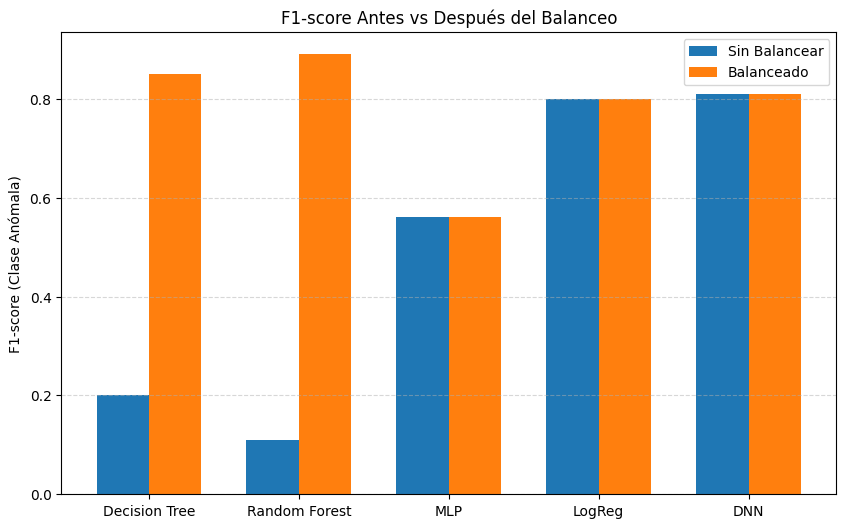

In [5]:
import matplotlib.pyplot as plt
import numpy as np


modelos = ["Decision Tree", "Random Forest", "MLP", "LogReg", "DNN"]
f1_before = [0.20, 0.11, 0.56, 0.80, 0.81]
f1_after = [0.85, 0.89, 0.56, 0.80, 0.81]

import numpy as np
x = np.arange(len(modelos))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, f1_before, width, label="Sin Balancear")
plt.bar(x + width/2, f1_after, width, label="Balanceado")

plt.xticks(x, modelos)
plt.ylabel("F1-score (Clase Anómala)")
plt.title("F1-score Antes vs Después del Balanceo")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


En el grafico anterior podemos apreciar de manera directa el impacto que tuvo la estrategia de balanceo sobre el rendimiento de cada modelo. En particular, puede observarse que los algoritmos basados en árboles, como Árbol de Decisión y Random Forest, presentan una mejora notable después del balanceo, pasando de un desempeño muy limitado en la detección de anomalías a valores de F1-score significativamente superiores. Esta diferencia evidencia que el desbalance del dataset afectaba considerablemente su capacidad para identificar correctamente los eventos minoritarios, y que el ajuste del conjunto de datos fue clave para obtener resultados más representativos y consistentes.

### Tabla Comparativa Final – Mejor Modelo por Métrica (Datos Balanceados)

| Métrica                      | Mejor Modelo      | Valor |
|------------------------------|-------------------|-------|
| Accuracy                     | Random Forest     | 0.8970 |
| Precisión No Anómala         | Random Forest     | 0.87 |
| Precisión Anómala            | Random Forest     | 0.93 |
| Recall No Anómala            | Random Forest     | 0.94 |
| Recall Anómala               | Random Forest     | 0.86 |
| F1 No Anómala                | Random Forest     | 0.90 |
| F1 Anómala                   | Random Forest     | 0.89 |
| Balance entre clases         | Árbol de Decisión | Simetría: 0.86 / 0.85 |
| Modelo más estable           | DNN / LogReg      | F1 ≈ 0.80 |
| Modelo más débil             | MLP               | F1 ≈ 0.56 |

La tabla comparativa final resume qué modelo destaca en cada métrica. El Random Forest se posiciona como el algoritmo con mejor rendimiento global en el conjunto balanceado, superando a los demás métodos en prácticamente todas las métricas. El Árbol de Decisión también presenta resultados estables y balanceados, mientras que modelos como MLP muestran un rendimiento considerablemente inferior en la detección de anomalías.

### Gráfico Ranking – F1-score de la Clase Anómala (Datos Balanceados)

Para complementar la comparación entre los modelos entrenados, se incluye un gráfico de ranking basado en el F1-score de la clase anómala utilizando los resultados obtenidos con el conjunto de datos balanceado. La razón de emplear datos balanceados es que este escenario permite evaluar de manera más justa el desempeño real de cada modelo frente a la detección de anomalías.

El F1-score se utiliza porque combina en un solo valor dos aspectos fundamentales del rendimiento: la precisión y el recall. En términos simples, el F1-score indica qué tan bien un modelo identifica las anomalías cuando realmente ocurren y qué tan pocos errores comete al detectarlas. Un valor alto significa que el modelo no solo encuentra la mayoría de las anomalías, sino que también evita marcar incorrectamente muchos casos normales como anómalos. Por ello, el F1-score es una medida adecuada para determinar qué modelo logra el mejor equilibrio en la detección de comportamientos anómalos.

Con esto, el gráfico de ranking permite identificar de manera rápida qué modelo presenta el mejor desempeño en la detección de anomalías, ofreciendo una visión clara del comportamiento de cada algoritmo bajo un conjunto de datos balanceado.

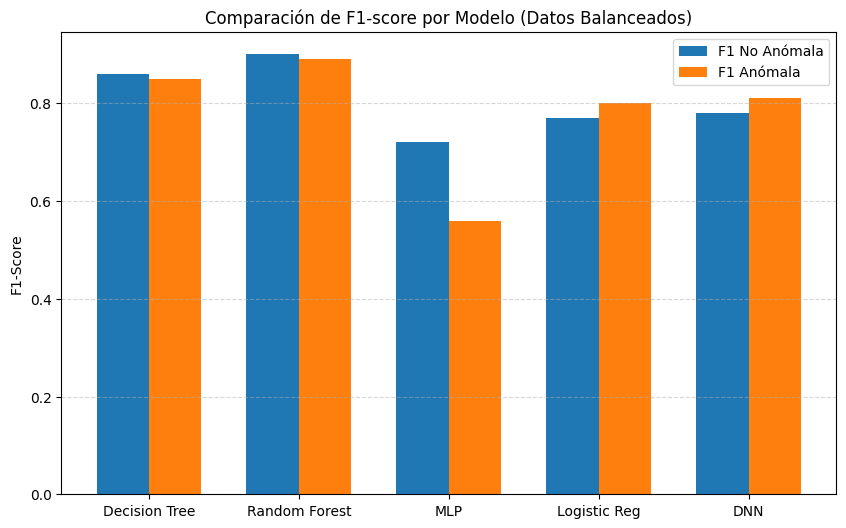

In [6]:
import matplotlib.pyplot as plt

# Datos F1 de cada modelo en el dataset balanceado
modelos = ["Decision Tree", "Random Forest", "MLP", "Logistic Reg", "DNN"]
f1_no_anomalo = [0.86, 0.90, 0.72, 0.77, 0.78]
f1_anomalo = [0.85, 0.89, 0.56, 0.80, 0.81]

x = range(len(modelos))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar([p - width/2 for p in x], f1_no_anomalo, width=width, label="F1 No Anómala")
plt.bar([p + width/2 for p in x], f1_anomalo, width=width, label="F1 Anómala")

plt.xticks(x, modelos)
plt.ylabel("F1-Score")
plt.title("Comparación de F1-score por Modelo (Datos Balanceados)")
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()


Como se observa en el grafico, los modelos basados en árboles (Random Forest y Árboles de Decisión) destacan significativamente frente al resto de algoritmos. Random Forest obtiene los valores más altos en ambas clases, seguido muy de cerca por Árbol de Decisión, mientras que los demás modelos presentan un rendimiento más limitado, especialmente en la detección de anomalías.

### Grafico de accuracy por modelo

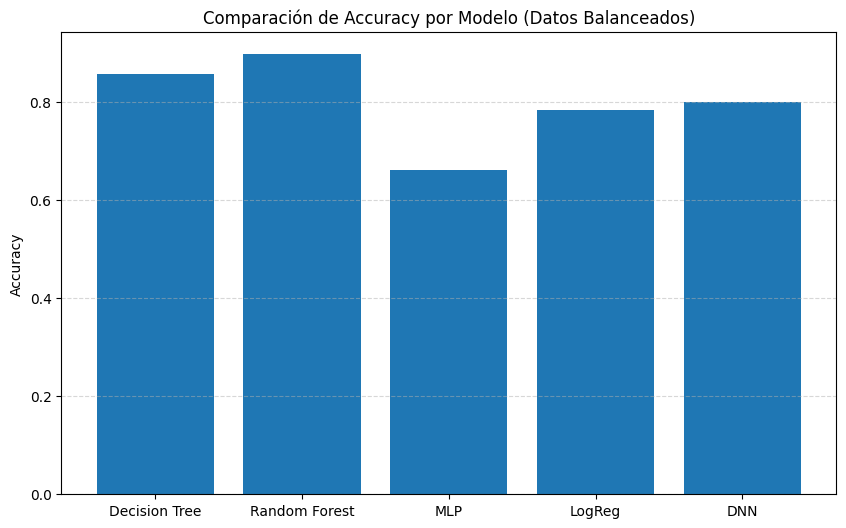

In [7]:
import matplotlib.pyplot as plt

modelos = ["Decision Tree", "Random Forest", "MLP", "LogReg", "DNN"]
accuracy = [0.8565, 0.8970, 0.6612, 0.7840, 0.7999]

plt.figure(figsize=(10,6))
plt.bar(modelos, accuracy)
plt.ylabel("Accuracy")
plt.title("Comparación de Accuracy por Modelo (Datos Balanceados)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


El gráfico de accuracy complementa el análisis realizado previamente con el F1-score de la clase anómala, ya que permite observar el desempeño global de cada modelo sin diferenciar entre clases. Mientras que el F1-score se enfoca específicamente en la capacidad del modelo para identificar anomalías, el accuracy ofrece una visión más general del porcentaje total de predicciones correctas. Al considerar ambos gráficos de manera conjunta, es posible obtener una perspectiva más completa del rendimiento de los modelos, equilibrando el comportamiento sobre la clase minoritaria con su eficacia global en todo el conjunto de datos.

### Diagrama de radar - Arboles de decision vs RandomForest
Para complementar lo anterior y comparar de manera más detallada el desempeño de los dos modelos con mejores resultados, se presenta el siguiente diagrama de radar.

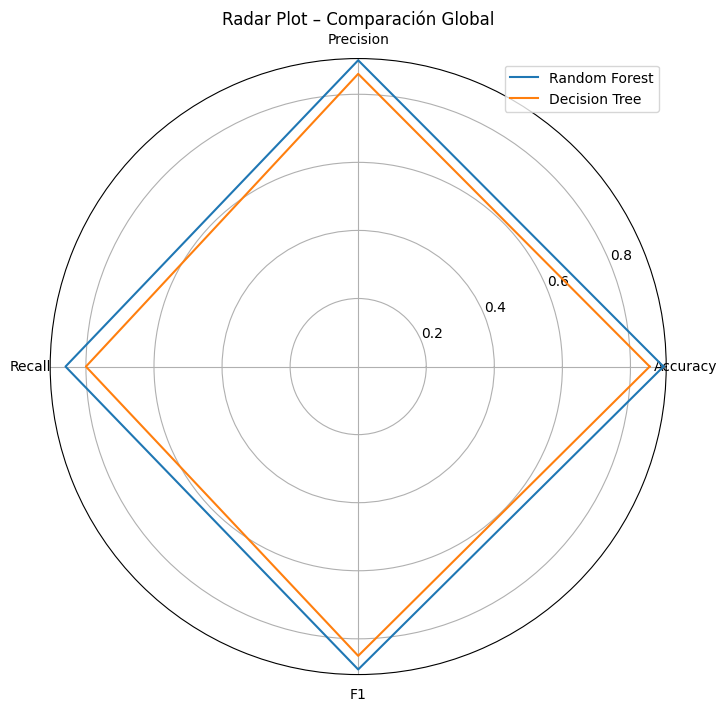

In [8]:
import matplotlib.pyplot as plt
import numpy as np

categorias = ["Accuracy", "Precision", "Recall", "F1"]
rf = [0.8970, 0.90, 0.86, 0.89]
dt = [0.8565, 0.86, 0.80, 0.85]

valores = np.arange(len(categorias))

plt.figure(figsize=(8,8))
angles = np.linspace(0, 2*np.pi, len(categorias), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

rf_plot = np.concatenate((rf, [rf[0]]))
dt_plot = np.concatenate((dt, [dt[0]]))

plt.polar(angles, rf_plot, label="Random Forest")
plt.polar(angles, dt_plot, label="Decision Tree")

plt.xticks(angles[:-1], categorias)
plt.title("Radar Plot – Comparación Global")
plt.legend()
plt.show()


En el gráfico se observa que Random Forest sobresale de manera consistente en todas las métricas, mostrando una cobertura más amplia en el radar, lo que indica un rendimiento superior y más equilibrado. Por su parte, Árbol de Decisión también presenta un comportamiento sólido, aunque ligeramente inferior en comparación. La forma más compacta de su área refleja pequeñas caídas en precisión y F1-score, pero aun así mantiene un desempeño competitivo.

## 7) Conclusiones

El presente trabajo tuvo como propósito el analizar, entrenar y evaluar diferentes modelos de aprendizaje automático (**Regresión Multivariada**, **Árboles de Decisión**, **Random Forest**, y **Redes Neuronales**) para **la detección de anomalías en una infraestructura cloud**, haciendo uso de un conjunto de datos compuestos por variables derivadas que muestran el comportamiento de los recursos computacionales. 

A lo largo del trabajo se entrenaron los modelos y se compararon sus resultados para poder determinar qué tan bien eran capaces de diferenciar entre instancias normales y anómalas, una tarea bastante compleja debido al desbalance del conjunto de datos.

Los resultados obtenidos nos muestran que el desbalance del conjunto de datos influyó de manera notable en el desempeño de los modelos. Aunque se aplicaron técnicas de balanceo en el conjunto de entrenamiento, el conjunto prueba se mantuvo sin modificar, lo que llevó a que se afectara la capacidad de los modelos para identificar casos anómalos.

En general, los modelos **basados en árboles** (en especial **Random Forest**) fueron los que ofrecieron un desempeño más estable. Además de obtener mejores medidas de precisión y recuperación, permitieron observar de manera clara qué variables influyen con mayor peso en la clasificación. Esto resultó útil para entender qué aspectos del sistema cloud cambian de forma significativa cuando ocurre una anomalía. Destacan variables vinculadas con la eficiencia energética y el tráfico, lo que sugiere que ciertos patrones de carga pueden anticipar fallos o comportamientos inusuales.

Por otro lado, los modelos basados en **Redes Neuronales**, especialmente **DNN**, presentaron mayor dificultad para poder hacer una separación adecuada para ambas clases. Si bien el modelo logró aprender algunos patrones, las probabilidades que genera para cada clase quedaron muy cercanas entre sí, lo que complicó la elección de un umbral adecuado. Esto refleja que, con los datos disponibles, la red neuronal no logra formar una frontera clara entre lo normal y lo anómalo, algo común cuando se trabaja con bases de datos muy desequilibradas.

A pesar de esto, el conjunto total de resultados aporta una visión amplia del problema: el dataset complica la tarea de clasificación, y no existe un modelo que resuelva completamente la separación entre clases, pero sí se identifican variables relevantes y comportamientos que servirían como base para un sistema de alerta temprana.

Aunque los modelos permitieron obtener una idea general del comportamiento del sistema y de los factores que influyen en la presencia de anomalías, todavía quedan varios caminos por explorar. Una de las primeras mejoras posibles sería trabajar más a fondo en el balance del conjunto de datos. La diferencia tan grande entre las clases hace que algunos algoritmos, especialmente los que dependen menos de reglas explícitas, tengan dificultades para aprender patrones reales. Probar otras técnicas de balanceo o incluso generar datos adicionales podría ayudar a mejorar la separación entre clases.

También sería interesante evaluar métodos que estén pensados específicamente para detectar comportamientos poco frecuentes, como los modelos orientados a detectar puntos atípicos o técnicas que trabajen directamente con distribuciones. Estos enfoques podrían capturar señales que los clasificadores estándar pasan por alto.

Otra línea de trabajo sería profundizar en el análisis de las variables. Aunque ya se identificaron algunas que parecen decisivas, vale la pena revisar si existen combinaciones o relaciones entre ellas que ayuden a entender mejor por qué se producen ciertos eventos anómalos. Esto podría derivar en una selección de características más sólida o incluso en una representación distinta de los datos.

Finalmente, también sería útil comparar los modelos actuales con otros algoritmos más recientes o ajustar con mayor detalle los parámetros de los que ya se usaron. Con esto se podría determinar si el desempeño actual se debe a limitaciones del modelo o a la naturaleza del dataset.
